In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-cleaned-autoimmune/data_cl.csv
/kaggle/input/flaredown-autoimmune-symptom-tracker/export.csv


In [2]:
data=pd.read_csv('/kaggle/input/flaredown-autoimmune-symptom-tracker/export.csv')
data.columns

/tmp/ipykernel_33/2929237078.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/flaredown-autoimmune-symptom-tracker/export.csv')


Index(['user_id', 'age', 'sex', 'country', 'checkin_date', 'trackable_id',
       'trackable_type', 'trackable_name', 'trackable_value'],
      dtype='object')

In [3]:
data.nunique()

user_id             42283
age                   100
sex                     4
country               164
checkin_date         1675
trackable_id       264603
trackable_type          7
trackable_name     117215
trackable_value     15961
dtype: int64

In [4]:
data[data['trackable_type']=='Condition'].groupby('trackable_name')['trackable_name'].value_counts()

trackable_name                    trackable_name                  
 Aching legs                       Aching legs                          1
 Low White Blood Count Disorders   Low White Blood Count Disorders    402
 Staphylococcus aureus             Staphylococcus aureus                1
 Teary                             Teary                                1
 blind spots reading               blind spots reading                  1
                                                                     ... 
🐦                                 🐦                                    48
📿                                 📿                                    44
🔅                                 🔅                                    47
🔪                                 🔪                                    49
🚀                                 🚀                                    51
Name: trackable_name, Length: 9443, dtype: int64

In [5]:
data[data['trackable_type']=='Condition'].groupby('trackable_name')['trackable_name'].count()

trackable_name
 Aching legs                          1
 Low White Blood Count Disorders    402
 Staphylococcus aureus                1
 Teary                                1
 blind spots reading                  1
                                   ... 
🐦                                    48
📿                                    44
🔅                                    47
🔪                                    49
🚀                                    51
Name: trackable_name, Length: 9443, dtype: int64

In [6]:
# data['user_id','checkin_date'].value_counts().describe()
data.groupby(["user_id", "checkin_date"])["user_id"].count()

user_id                           checkin_date
QEVuQwEA++2fi8XAwh3BnSEwL172Dg==  2019-08-25       6
                                  2019-08-26       6
                                  2019-08-27       6
                                  2019-08-28      17
                                  2019-08-29      15
                                                  ..
QEVuQwEAzzpKNttM+L8eBIqxvjCbug==  2019-07-30       8
                                  2019-07-31       8
                                  2019-08-03      10
QEVuQwEAzzwbsDaYSqXLmR0TDn4HWA==  2017-02-13       3
QEVuQwEAzzxONcy6X2g6o2X7xk36Lw==  2019-02-10      29
Name: user_id, Length: 383228, dtype: int64

In [7]:
result = data.groupby(['user_id', 'checkin_date']).size().reset_index(name='date_count')
unique_dates_count = result.groupby('user_id').size()

In [8]:
unique_dates_count[unique_dates_count.values>1000]


user_id
QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==    1375
QEVuQwEAgu4h6TUSURerctVPXKDehA==    1140
QEVuQwEAlNMIH8RXhjZvx6HzoW8iXQ==    1622
dtype: int64

In [9]:
def find_percentile(df, threshold):
  """Finds the percentile of users whose total daily entries are more than threshold."""
  df["num_entries"] = df.groupby(["user_id", "checkin_date"])["user_id"].transform("size")
  users = df[df["num_entries"] > threshold]["user_id"].tolist()
  num_users = len(users)
  percentile = num_users / len(df) * 100
  return percentile

In [10]:
 
threshold = 50
percentile = find_percentile(data, threshold)
print(f"The percentile of users whose total daily entries are more than {threshold} is {percentile}.")

The percentile of users whose total daily entries are more than 50 is 14.400362176433632.


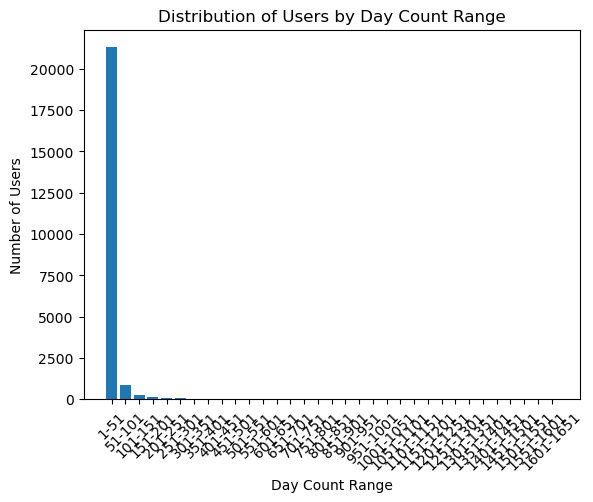

In [11]:
import matplotlib.pyplot as plt

def create_distribution(dataframe, range_size):
    # Define the range intervals
    min_value = dataframe.values.min()
    max_value = dataframe.values.max()
    intervals = range(min_value, max_value + range_size, range_size)

    # Count the number of users in each range
    counts = dataframe.groupby(pd.cut(dataframe.values, intervals)).size()

    # Create the distribution plot
    x = [f"{interval.left}-{interval.right}" for interval in counts.index]
    y = counts.values

    plt.bar(x, y)
    plt.xlabel("Day Count Range")
    plt.ylabel("Number of Users")
    plt.title("Distribution of Users by Day Count Range")
    plt.xticks(rotation=45)
    plt.show()

# Example usage
import pandas as pd

# Assuming you have a dataframe named 'dataframe' with 'user_id' and 'days' columns

range_size = 50
create_distribution(unique_dates_count, range_size)


Does X treatment affect Y symptom positively/negatively/not at all? What are the most strongly-correlated symptoms and treatments?

Are there subsets within our current diagnoses that could more accurately represent symptoms and predict effective treatments?

Can we reliably predict what triggers a flare for a given user or all users with a certain condition?

Could we recommend treatments more effectively based on similarity of users, rather than specific symptoms and conditions? (Netflix recommendations for treatments)

Can we quantify a patient’s level of disease activity based on their symptoms? How different is it from our existing measures?

Can we predict which symptom should be treated to have the greatest effect on a given illness?

How accurately can we guess a condition based on a user’s symptoms?

Can we detect new interactions between treatments?

In [12]:
data

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,1
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,1
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,20
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,20
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4,20
...,...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN,17
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN,17
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN,17
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN,17


In [13]:
import seaborn as sns
df=data.copy()
df=data.copy()
sector_name = df[df.trackable_type=="Condition"].trackable_name.value_counts().iloc[0:50]
sector_name

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fibromyalgia                                        55255
Depression                                          50109
Anxiety                                             46968
Chronic fatigue syndrome                            28259
Migraine                                            26082
IBS                                                 17324
Fatigue                                             14920
Asthma                                              14218
Endometriosis                                       13873
Ehlers-Danlos syndrome                              13677
Irritable bowel syndrome                            11801
Headaches                                           11362
Generalized anxiety disorder                        10275
Chronic Migraines                                   10034
joint pain                                           9781
POTS                                                 8946
Allergies                                            8722
Chronic Pain  

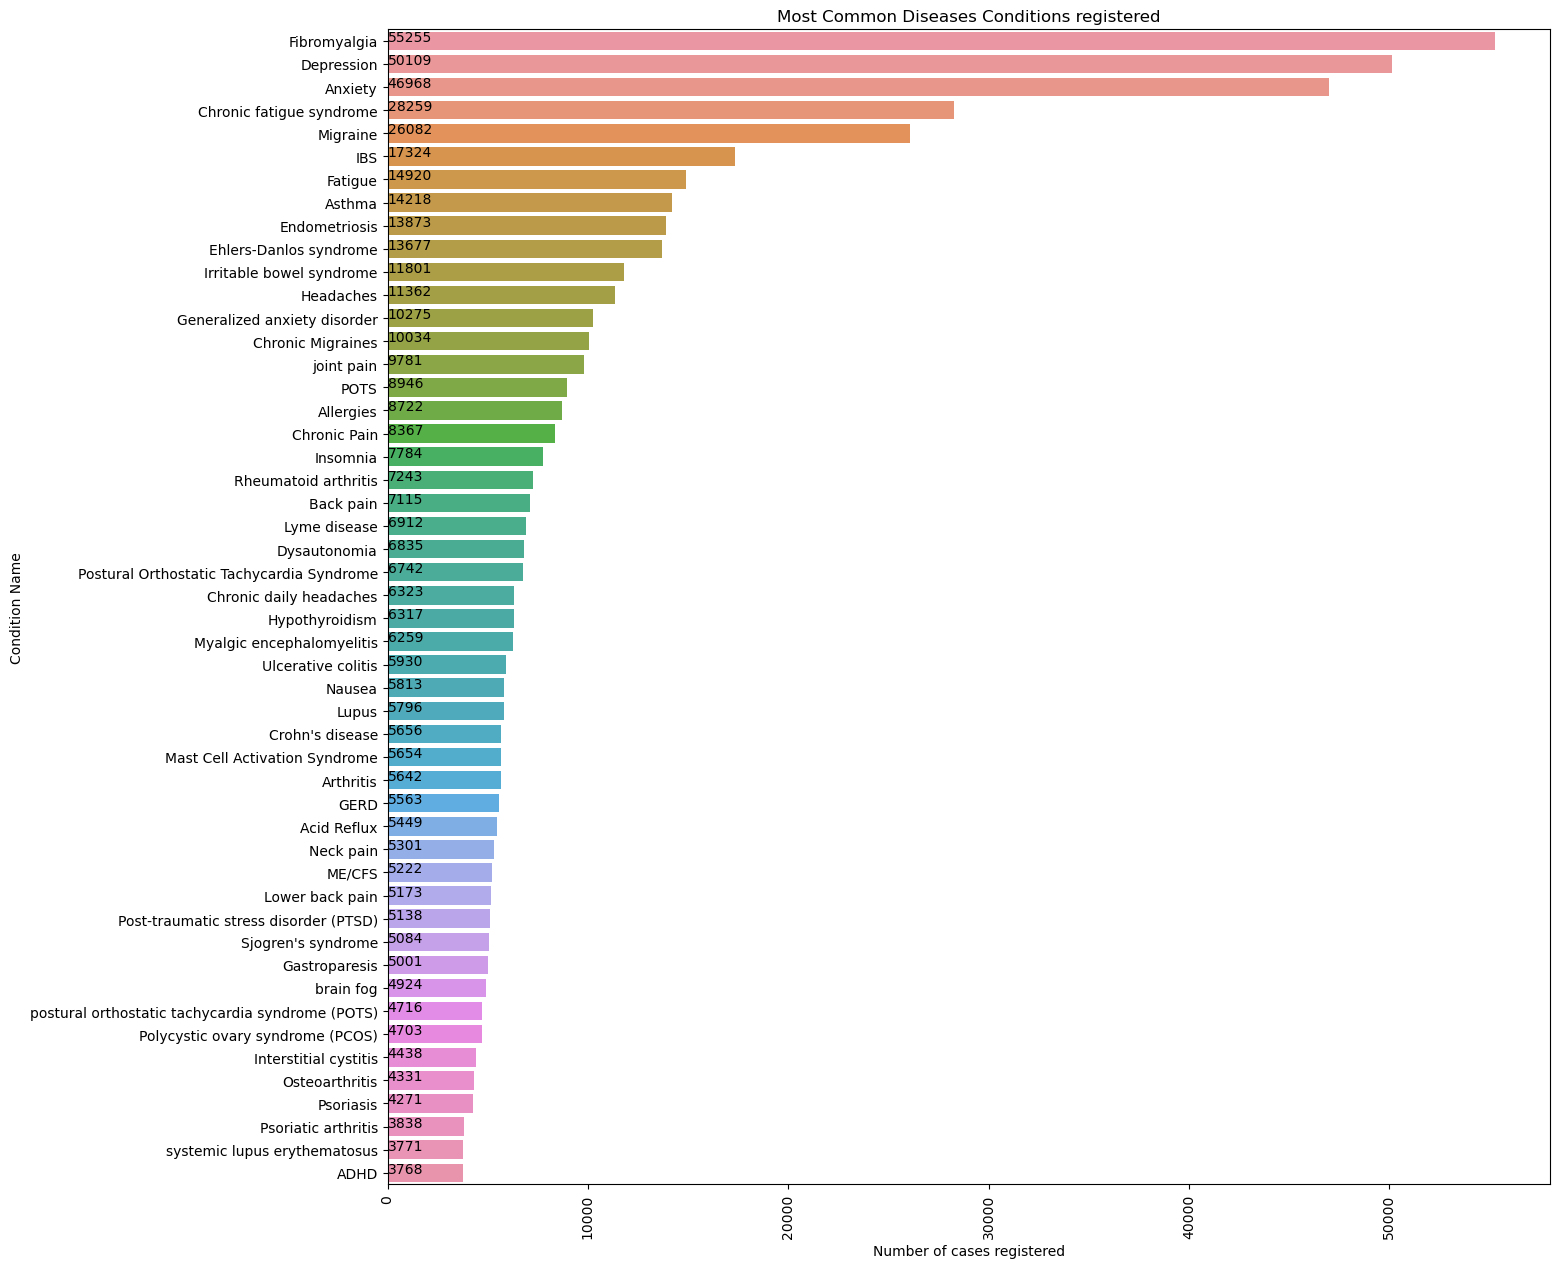

In [14]:

plt.figure(figsize=(15,15))

sector_name = df[df.trackable_type=="Condition"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=sector_name.values, y=sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Number of cases registered')
plt.ylabel('Condition Name')
plt.title("Most Common Diseases Conditions registered")
plt.show()

In [15]:
data[data['user_id']=='QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries
7899490,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2016-01-19,220,Condition,Chronic fatigue syndrome,3,32
7899491,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2016-01-19,616,Condition,Lyme disease,3,32
7899492,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2016-01-19,1328,Condition,Procrastination,2,32
7899493,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2016-01-19,8,Symptom,Anxiety,2,32
7899494,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2016-01-19,63,Symptom,Dizziness,2,32
...,...,...,...,...,...,...,...,...,...,...
7920384,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2019-12-04,10608,Treatment,Equilibrant,2 x 0.125 tablet,16
7920385,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2019-12-06,5805,Treatment,Midodrine,10mg x3,4
7920386,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2019-12-06,6060,Treatment,Naltrexone,3.0 mg,4
7920387,QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==,25.0,female,AU,2019-12-06,10598,Treatment,IVIG,10 g,4


In [16]:
data[data['trackable_name']=='Fibromyalgia'].trackable_value

291        0
308        2
347        1
363        1
465        2
          ..
7970462    2
7970479    2
7970496    2
7970513    2
7970536    2
Name: trackable_value, Length: 56438, dtype: object

will try to track if there is a relation between a disease and food habits and emotinal states


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976223 entries, 0 to 7976222
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          object 
 1   age              float64
 2   sex              object 
 3   country          object 
 4   checkin_date     object 
 5   trackable_id     object 
 6   trackable_type   object 
 7   trackable_name   object 
 8   trackable_value  object 
 9   num_entries      int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 608.5+ MB


cleaning_data

In [18]:
data_cl=data.copy()

In [19]:
data_cl

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,1
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,1
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,20
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,20
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4,20
...,...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN,17
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN,17
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN,17
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN,17


In [20]:
data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].value_counts()

Headache             108550
Fatigue              107512
Nausea                89520
Brain fog             73175
Joint pain            64936
                      ...  
hearing heart             1
flactu                    1
'Gelähmt'                 1
Low blood count           1
poor productivity         1
Name: trackable_name, Length: 23157, dtype: int64

In [21]:
# Clean the 'trackable_name' column by converting to lowercase and removing whitespaces
data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'] = data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].str.lower().str.strip()

# Print the cleaned 'trackable_name' column
print(data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].value_counts())

/tmp/ipykernel_33/2974938738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'] = data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].str.lower().str.strip()


Headache             108550
Fatigue              107512
Nausea                89520
Brain fog             73175
Joint pain            64936
                      ...  
hearing heart             1
flactu                    1
'Gelähmt'                 1
Low blood count           1
poor productivity         1
Name: trackable_name, Length: 23157, dtype: int64


In [23]:
data_cl.loc[data_cl['trackable_type']=='Symptom','trackable_name']=data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].str.lower().str.strip()

In [24]:
data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].value_counts().head(10)

headache                 108569
fatigue                  107634
nausea                    89564
brain fog                 73191
joint pain                64940
fatigue and tiredness     63395
anxiety                   61602
diarrhea                  52423
dizziness                 50151
depression                43422
Name: trackable_name, dtype: int64

there are lot similar symptom names , they can be merged for better data anlysis 

In [ ]:
from fuzzywuzzy import fuzz

# List of unique symptom names
symptoms = data_cl[data_cl['trackable_type'] == 'Symptom']['trackable_name'].unique()

# Function to find similar names and group them
def merge_similar_names(names, threshold=80):
    merged_names = {}
    for name in names:
        merged_with = [n for n in merged_names.keys() if fuzz.ratio(name, n) > threshold]
        if not merged_with:
            merged_names[name] = name
        else:
            merged_names[name] = merged_with[0]
    return merged_names

# Get merged names
merged_names_mapping = merge_similar_names(symptoms)
print(merged_names_mapping)

now merging them using merged_names_mapping

In [ ]:
# Reverse the merged_names_mapping to get a dictionary with grouped symptom names as keys
# and lists of original symptoms as values
grouped_symptoms_mapping = {}
for symptom, grouped_symptom in merged_names_mapping.items():
    grouped_symptoms_mapping.setdefault(grouped_symptom, []).append(symptom)

# Filter out the grouped symptom names that have only one symptom
grouped_symptoms_mapping = {grouped_symptom: original_symptoms for grouped_symptom, original_symptoms in grouped_symptoms_mapping.items() if len(original_symptoms) > 1}

# Print the grouped symptom names and their corresponding original symptoms
for grouped_symptom, original_symptoms in grouped_symptoms_mapping.items():
    print(f"Grouped Symptom: {grouped_symptom}")
    print(f"Original Symptoms: {', '.join(original_symptoms)}")
    print()


In [ ]:
# Apply the merged names to the DataFrame
data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'] = data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].map(merged_names_mapping)
data_cl[data_cl['trackable_type']=='Symptom']['trackable_name'].value_counts()


In [ ]:
# data_cl.loc[data_cl['trackable_type']=='Treatment','trackable_name']=data.loc[data['trackable_type']=='Treatment','trackable_name']
# for the mistake u have done in symtoms

In [ ]:
data_cl.loc[data_cl['trackable_type']=='Treatment','trackable_name'].value_counts()

In [ ]:
import pandas as pd

# Count the occurrences of each symptom
symptoms = data_cl[data_cl['trackable_type'] == 'Symptom']
symptom_counts = symptoms['trackable_name'].value_counts()

# Sort the symptom counts in descending order
sorted_counts = symptom_counts.sort_values(ascending=False)

# Calculate the cumulative sum of the counts
cumulative_sum = sorted_counts.cumsum()
cumulative_sum = cumulative_sum.reset_index(drop=True)
# Find the index where the cumulative sum crosses 50%
index_50_percent = len(cumulative_sum[cumulative_sum <= cumulative_sum[15184]/ 2])

# Get the number of symptoms constituting 50% of the total values


# Print the result
print("Number of symptoms constituting 50% of total values:", index_50_percent)


In [ ]:
import pandas as pd

# Count the occurrences of each treatment
treatments = data_cl[data_cl['trackable_type'] == 'Treatment']
treatment_counts = treatments['trackable_name'].value_counts()

# Sort the treatment counts in descending order
sorted_counts = treatment_counts.sort_values(ascending=False)

# Calculate the cumulative sum of the counts
cumulative_sum = sorted_counts.cumsum()
cumulative_sum = cumulative_sum.reset_index(drop=True)

# Find the index where the cumulative sum crosses 50%
index_50_percent = len(cumulative_sum[cumulative_sum <= cumulative_sum[8154] / 2])

# Get the number of treatments constituting 50% of the total values
num_treatments_50_percent = index_50_percent

# Print the result
print("Number of treatments constituting 50% of total values:", num_treatments_50_percent)


In [ ]:
data[data['trackable_name']=='Fibromyalgia']

In [ ]:
data[data['trackable_name']=='Fibromyalgia'].user_id.nunique()

In [ ]:
fibromyalgia_users = data[data['trackable_name'] == 'Fibromyalgia']['user_id'].unique().tolist()

In [ ]:
fibromyalgia_rows = data[data['user_id'].isin(fibromyalgia_users)]

In [ ]:
fibromyalgia_rows

fibromyalgia_rows[fibromyalgia_rows['trackable_type']=='Treatment']
#can i cluster the trackable names types or divide them as segments to suggest

In [ ]:
data_cl['trackable_type'].value_counts()

In [ ]:
fibromyalgia_rows[fibromyalgia_rows['trackable_type']=='Symptom']['trackable_name'].value_counts()

In [ ]:
# len(cumulative_sum[cumulative_sum <= cumulative_sum[23156]/ 1.33])

In [ ]:
data_cl['trackable_name'] = data_cl['trackable_name'].replace('fatigue and tiredness', 'fatigue')

In [ ]:
import pandas as pd

# Assuming you have processed data in the 'data_cl' DataFrame

# Step 1: Save the DataFrame as a CSV file locally
data_cl.to_csv('data_cl.csv', index=False)  # Change the filename if desired

# Step 2: Upload the CSV file to Kaggle
# You can manually upload the 'data_cl.csv' file to your Kaggle dataset or kernel


In [3]:
import pandas as pd
data=pd.read_csv('/kaggle/input/flaredown-autoimmune-symptom-tracker/export.csv')
data_cl=pd.read_csv('/kaggle/input/data-cleaned-autoimmune/data_cl.csv')

/tmp/ipykernel_32/1018040673.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/flaredown-autoimmune-symptom-tracker/export.csv')
/tmp/ipykernel_32/1018040673.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cl=pd.read_csv('/kaggle/input/data-cleaned-autoimmune/data_cl.csv')


In [4]:
symptoms = data_cl[data_cl['trackable_type'] == 'Symptom']
top_10_symptoms = symptoms['trackable_name'].value_counts().head(20).index.tolist()

In [5]:
treatments = data_cl[data_cl['trackable_type'] == 'Treatment']
top_10_treatments = treatments['trackable_name'].value_counts().head(10).index.tolist()

In [6]:
treatments['trackable_name'].count()

901820

In [7]:
import pandas as pd

# Count the occurrences of each symptom
symptom_counts = symptoms['trackable_name'].value_counts()

# Sort the symptom counts in descending order
sorted_counts = symptom_counts.sort_values(ascending=False)

# Calculate the cumulative sum of the counts
cumulative_sum = sorted_counts.cumsum()
cumulative_sum = cumulative_sum.reset_index(drop=True)
# Find the index where the cumulative sum crosses 50%
index_50_percent = len(cumulative_sum[cumulative_sum <= cumulative_sum[22770]/ 1.33])

# Get the number of symptoms constituting 50% of the total values


# Print the result
print("Number of symptoms constituting 50% of total values:", index_50_percent)


Number of symptoms constituting 50% of total values: 620


In [8]:
user_records = data[data['user_id'] == 'QEVuQwEAaW1v3n+J3kqt0E8dlBup+g==']
user_records_description = user_records.describe()

print(user_records_description)

           age
count  20899.0
mean      25.0
std        0.0
min       25.0
25%       25.0
50%       25.0
75%       25.0
max       25.0


In [9]:
# fibromyalgia_rows[fibromyalgia_rows['trackable_type']=='Treatment']['trackable_name'].value_counts()

In [10]:
# fibromyalgia_rows[fibromyalgia_rows['trackable_name']=='Ibuprofen']

In [11]:

# merged_data.loc[~merged_data['trackable_name_y'].isin(top_10_symptoms), 'trackable_name_y'] = 'rare_symtomps'


In [12]:
import pandas as pd
from scipy.stats import chi2_contingency
df=data_cl.copy()
# df.loc[(df['trackable_name'] != 'Ibuprofen') & (df['trackable_type'] == 'Treatment'), 'trackable_name'] = 'non_ibuprofen'

# Filter the dataframe for treatments and symptoms
treatments = df[df['trackable_type'] == 'Treatment']
symptoms = df[df['trackable_type'] == 'Symptom']

# Merge treatments and symptoms on user_id and checkin_date
merged_data = pd.merge(treatments, symptoms, on=['user_id', 'checkin_date'], how='inner')
merged_data.loc[~merged_data['trackable_name_y'].isin(top_10_symptoms), 'trackable_name_y'] = 'rare_symtomps'
# Filter for specific treatments and symptoms
top_10_symptoms.append('rare_symtomps')
specific_treatments = top_10_treatments  # Add other treatments as needed
specific_symptoms = top_10_symptoms  # Add other symptoms as needed

# Filter the merged data for specific treatments and symptoms
filtered_data = merged_data[(merged_data['trackable_name_x'].isin(specific_treatments)) &  ( merged_data['trackable_name_y'].isin(specific_symptoms))]

contingency_table = pd.crosstab(filtered_data['trackable_name_y'], filtered_data['trackable_name_x'])

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Chi-square statistic: 26301.89685141098
p-value: 0.0


In [13]:
filtered_data['trackable_name_y']


225             brain fog
226               fatigue
227         rare_symtomps
228         rare_symtomps
229         rare_symtomps
                ...      
12212944    rare_symtomps
12212945         diarrhea
12212946    rare_symtomps
12212947    rare_symtomps
12212948           nausea
Name: trackable_name_y, Length: 1375702, dtype: object

In [14]:
contingency_table

trackable_name_x,Gabapentin,Ibuprofen,Magnesium,Naproxen,Omeprazole,Paracetamol,Prednisone,Tramadol,Vitamin D3,Vitamin d
trackable_name_y,,,,,,,,,,
abdominal pain,783,1958,793,881,1500,1509,621,589,1018,746
anxiety,2072,4742,3303,1405,1357,1969,581,1408,2470,1827
back pain,1485,2357,1418,1654,942,1959,508,1898,1147,1344
bloating,268,1838,1857,899,1095,982,447,728,465,2063
brain fog,2017,5457,2923,1992,1396,2566,1232,1386,2907,2228
chest pain,630,689,1255,448,773,724,960,1366,673,294
constipation,1362,3698,1353,947,775,810,1447,1433,1501,1089
depression,1586,3183,1752,1544,952,1547,351,1095,1291,1175
diarrhea,1119,4473,2505,1476,2149,2094,1761,1841,1919,3156


In [15]:

# Calculate the total count for each column
col_totals = contingency_table.sum()

# Convert the contingency table to percentages
contingency_table_percentage = contingency_table.apply(lambda x: x / x.sum() * 100, axis=0)

# Print the contingency table with percentages
contingency_table_percentage


trackable_name_x,Gabapentin,Ibuprofen,Magnesium,Naproxen,Omeprazole,Paracetamol,Prednisone,Tramadol,Vitamin D3,Vitamin d
trackable_name_y,,,,,,,,,,
abdominal pain,0.716213,0.740195,0.459979,0.901316,1.364132,1.193149,0.610199,0.446520,0.703078,0.638677
anxiety,1.895266,1.792647,1.915904,1.437399,1.234085,1.556866,0.570895,1.067403,1.705895,1.564159
back pain,1.358335,0.891031,0.822511,1.692141,0.856675,1.548959,0.499165,1.438871,0.792171,1.150646
bloating,0.245141,0.694830,1.077152,0.919731,0.995817,0.776456,0.439226,0.551896,0.321150,1.766207
brain fog,1.844958,2.062943,1.695485,2.037935,1.269553,2.028908,1.210573,1.050724,2.007708,1.907469
chest pain,0.576263,0.260467,0.727962,0.458331,0.702983,0.572459,0.943304,1.035562,0.464805,0.251704
constipation,1.245827,1.397978,0.784807,0.968838,0.704802,0.640458,1.421834,1.086355,1.036659,0.932331
depression,1.450720,1.203289,1.016247,1.579604,0.865769,1.223196,0.344895,0.830118,0.891624,1.005959
diarrhea,1.023554,1.690955,1.453025,1.510036,1.954347,1.655702,1.730372,1.395659,1.325349,2.701962


In [16]:
import pandas as pd

# Assuming you have a DataFrame named 'data_cl' with columns 'user_id', 'checkin_date', 'trackable_type', and 'trackable_name'

# Filter the data_cl for ibuprofen treatments
ibuprofen_data = data_cl[(data_cl['trackable_type'] == 'Treatment') & (data_cl['trackable_name'] == 'Ibuprofen')]

# Get the user_id and checkin_date of ibuprofen usage
ibuprofen_users_dates = ibuprofen_data[['user_id', 'checkin_date']].drop_duplicates()

# Merge the ibuprofen usage data with the symptom data based on user_id and checkin_date
merged_data = pd.merge(ibuprofen_users_dates, data_cl[data_cl['trackable_type'] == 'Symptom'], on=['user_id', 'checkin_date'], how='inner')

# Get the symptom distribution for ibuprofen usage on the same day
symptom_distribution = merged_data['trackable_name'].value_counts(normalize=True) * 100

# Print the symptom distribution for ibuprofen usage on the same day
print(symptom_distribution)


fatigue                   4.793060
headache                  3.534853
nausea                    2.545911
brain fog                 2.063731
anxiety                   1.792954
                            ...   
lumbar spine stiffness    0.000378
calf pain (left)          0.000378
calf pain (right)         0.000378
ankle pain (left)         0.000378
ear buildup               0.000378
Name: trackable_name, Length: 3282, dtype: float64


In [17]:
merged_data['trackable_name'].value_counts().head(20).sum()

77930

In [18]:
# import pandas as pd

# # Filter the DataFrame for treatments
# treatments = data_cl[data_cl['trackable_type'] == 'Treatment']

# # Create a pivot table to get all combinations of user_id, checkin_date, and trackable_name
# pivot_table = treatments.pivot_table(index=['user_id', 'checkin_date'], columns='trackable_name', aggfunc='size', fill_value=0)

# # Create the contingency table for individual effects
# contingency_individual = pd.crosstab(pivot_table.index.get_level_values(0), pivot_table > 0, margins=False)

# # Create the contingency table for combined effects (at least one medication taken)
# contingency_combined = pd.crosstab(pivot_table.index.get_level_values(0), pivot_table.sum(axis=1) > 0, margins=False)

# # Print the contingency tables
# print("Contingency table for individual effects:")
# print(contingency_individual)

# print("\nContingency table for combined effects:")
# print(contingency_combined)


In [19]:
filtered_data.groupby(['user_id','checkin_date'])['trackable_name_x'].nunique()

user_id                           checkin_date
QEVuQwEA+/IvXrvEfxv3K+i06e/FkQ==  2019-03-08      3
QEVuQwEA+/zUvhAfOMgfi3kwGIyoag==  2018-03-01      2
                                  2018-03-02      2
                                  2018-03-03      2
                                  2018-03-04      2
                                                 ..
QEVuQwEAzzbGedVTDIuQFBYxXLlPxQ==  2019-04-16      1
                                  2019-04-17      1
                                  2019-04-20      1
                                  2019-04-21      1
QEVuQwEAzzxONcy6X2g6o2X7xk36Lw==  2019-02-10      2
Name: trackable_name_x, Length: 66054, dtype: int64

In [20]:
filtered_data[filtered_data['user_id']=='QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==']

,user_id,age_x,sex_x,country_x,checkin_date,trackable_id_x,trackable_type_x,trackable_name_x,trackable_value_x,num_entries_x,age_y,sex_y,country_y,trackable_id_y,trackable_type_y,trackable_name_y,trackable_value_y,num_entries_y
12205675,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-01-15,4544,Treatment,Ibuprofen,1000mg,24,30.0,other,US,242,Symptom,fatigue,2,24
12205676,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-01-15,4544,Treatment,Ibuprofen,1000mg,24,30.0,other,US,1699,Symptom,rare_symtomps,2,24
12205677,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-01-15,4544,Treatment,Ibuprofen,1000mg,24,30.0,other,US,98,Symptom,headache,2,24
12205678,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-01-15,4544,Treatment,Ibuprofen,1000mg,24,30.0,other,US,1,Symptom,abdominal pain,1,24
12205679,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-01-15,4544,Treatment,Ibuprofen,1000mg,24,30.0,other,US,230,Symptom,rare_symtomps,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212944,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-11-30,4544,Treatment,Ibuprofen,800mg,28,30.0,other,US,6685,Symptom,rare_symtomps,0,28
12212945,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-11-30,4544,Treatment,Ibuprofen,800mg,28,30.0,other,US,56,Symptom,diarrhea,0,28
12212946,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-11-30,4544,Treatment,Ibuprofen,800mg,28,30.0,other,US,230,Symptom,rare_symtomps,1,28
12212947,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,other,US,2019-11-30,4544,Treatment,Ibuprofen,800mg,28,30.0,other,US,341,Symptom,rare_symtomps,1,28


In [21]:
# merged_data['trackable_name_x'].value_counts()

In [22]:
merged_data

,user_id,checkin_date,age,sex,country,trackable_id,trackable_type,trackable_name,trackable_value,num_entries
0,QEVuQwEAookfJXqVy92WEQWogzQJRw==,2015-05-25,31.0,other,US,275,Symptom,brain fog,1,19
1,QEVuQwEAookfJXqVy92WEQWogzQJRw==,2015-05-25,31.0,other,US,242,Symptom,fatigue,2,19
2,QEVuQwEAookfJXqVy92WEQWogzQJRw==,2015-05-25,31.0,other,US,281,Symptom,heart rate,2,19
3,QEVuQwEAookfJXqVy92WEQWogzQJRw==,2015-05-25,31.0,other,US,282,Symptom,focus,1,19
4,QEVuQwEAookfJXqVy92WEQWogzQJRw==,2015-05-25,31.0,other,US,283,Symptom,si joint pain,1,19
...,...,...,...,...,...,...,...,...,...,...
264419,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,2019-11-30,30.0,other,US,6685,Symptom,gas/bloating,0,28
264420,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,2019-11-30,30.0,other,US,56,Symptom,diarrhea,0,28
264421,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,2019-11-30,30.0,other,US,230,Symptom,vertigo,1,28
264422,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,2019-11-30,30.0,other,US,341,Symptom,tinnitus,1,28


In [23]:
prednisone_user=data[data['trackable_name']=='Prednisone']['user_id'].unique()

In [24]:
data_cl['trackable_type'].value_counts()

Symptom      3642279
Weather      1393806
Condition    1111517
Treatment     901820
Food          480971
Tag           445669
HBI              161
Name: trackable_type, dtype: int64

want to check the role of food in causing flare

In [25]:
fibromyalgia_users = data_cl[data_cl['trackable_name'] == 'Fibromyalgia']['user_id'].unique().tolist()

In [26]:
fibromyalgia_rows = data_cl[data_cl['user_id'].isin(fibromyalgia_users)]

In [27]:
data_cl

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,1
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,1
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,20
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,20
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4,20
...,...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN,17
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN,17
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN,17
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN,17


In [28]:
fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']['trackable_value']

291        0
308        2
347        1
363        1
465        2
          ..
7970462    2
7970479    2
7970496    2
7970513    2
7970536    2
Name: trackable_value, Length: 55255, dtype: object

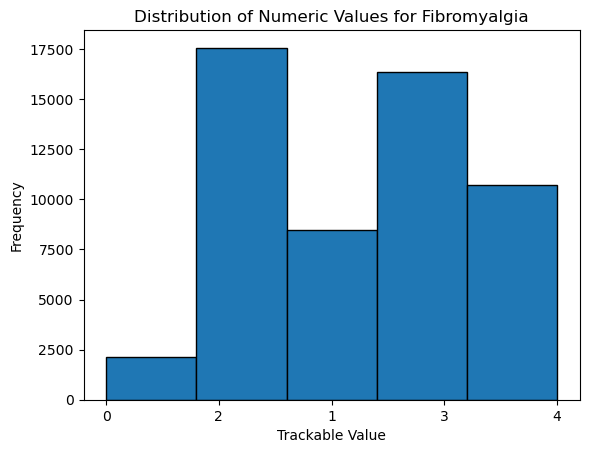

In [29]:
import matplotlib.pyplot as plt

# Assuming 'fibromyalgia_rows' is your DataFrame containing the data
fibromyalgia_values = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']['trackable_value']

# Drop any missing or NaN values
fibromyalgia_values = fibromyalgia_values.dropna()

# Plot the histogram
plt.hist(fibromyalgia_values, bins=5, edgecolor='black')
plt.xlabel('Trackable Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numeric Values for Fibromyalgia')
plt.show()


/tmp/ipykernel_32/1656465525.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_user_data['checkin_date'] = pd.to_datetime(max_user_data['checkin_date'])


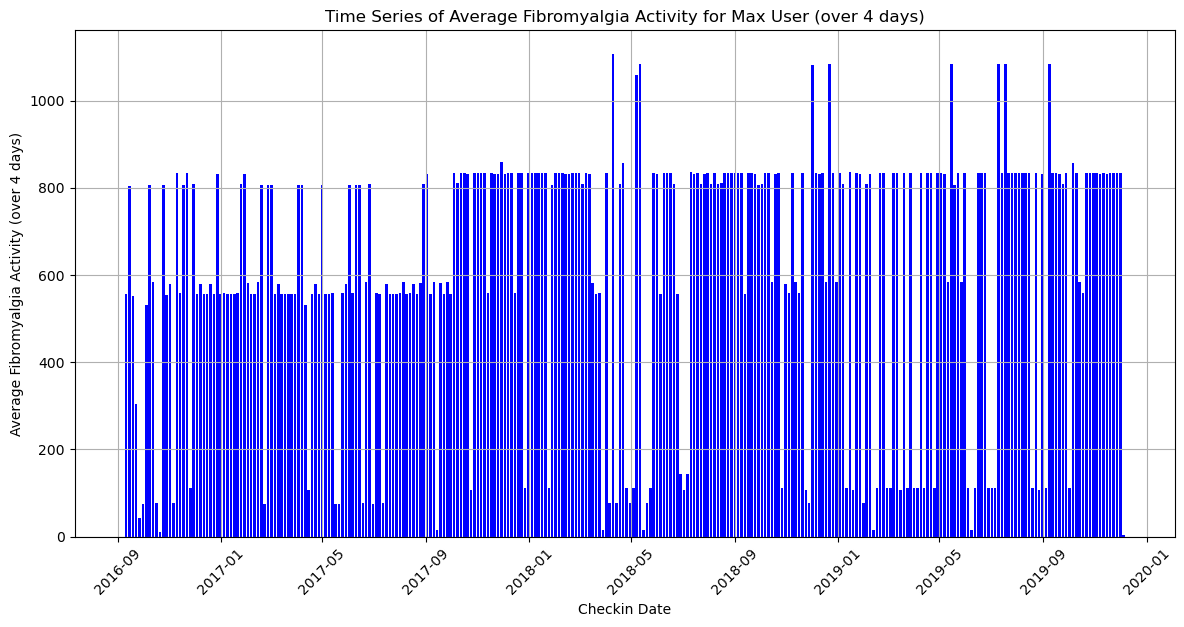

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'fibromyalgia_rows' is your DataFrame containing the data
# Filter the data for rows where 'trackable_name' is 'Fibromyalgia'
fibromyalgia_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']

# Group the data by 'user_id' and calculate the entry count for each user
user_counts = fibromyalgia_data.groupby('user_id').size().reset_index(name='entry_count')

# Find the user_id with the highest entry count
max_user_id = user_counts.loc[user_counts['entry_count'].idxmax(), 'user_id']

# Filter the data for the user with the highest entry count
max_user_data = fibromyalgia_data[fibromyalgia_data['user_id'] == max_user_id]

# Convert 'checkin_date' to datetime format
max_user_data['checkin_date'] = pd.to_datetime(max_user_data['checkin_date'])

# Sort the data by 'checkin_date'
max_user_data = max_user_data.sort_values(by='checkin_date')

# Group the data for the max user by a 4-day rolling window and calculate the average trackable value
average_4_days = max_user_data.groupby(pd.Grouper(key='checkin_date', freq='4D'))['trackable_value'].mean().reset_index()

# Create a bar graph of the average trackable value over 4 days for the max user
plt.figure(figsize=(12, 6))
plt.bar(average_4_days['checkin_date'], average_4_days['trackable_value'], width=3, color='b')
plt.xlabel('Checkin Date')
plt.ylabel('Average Fibromyalgia Activity (over 4 days)')
plt.title('Time Series of Average Fibromyalgia Activity for Max User (over 4 days)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [31]:
 fibromyalgia_rows.groupby(['user_id']).size().reset_index(name='entry_count')


,user_id,entry_count
0,QEVuQwEA++pbRBEAssUx/BQ4GSxBbQ==,3
1,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,412
2,QEVuQwEA+/IvXrvEfxv3K+i06e/FkQ==,96
3,QEVuQwEA+/sIf+0WGsd2x8T5aQYfjg==,64
4,QEVuQwEA+0N/mAqXWdykypwXAQbNeA==,9
...,...,...
7792,QEVuQwEAzw8zP81F5pxtY3k5q9ThRA==,322
7793,QEVuQwEAzwNZ5G35Hm1EUMGg0fd0GQ==,15
7794,QEVuQwEAzwnaPxedJgtTjVRQT8VEtA==,6
7795,QEVuQwEAzye6f09ESt+fSX2dSfbQCw==,7


In [32]:
fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']['trackable_name'].unique().tolist()

['coffee',
 'chicken',
 'potato chips ',
 'pizza',
 'Bread',
 'chobani yogurt',
 'Coffee Erika style',
 'Marijuana',
 'Sunshine',
 'chips',
 'tea',
 'water',
 'breakfast sandwich',
 'cake',
 'oatmeal ',
 'Berry granola ',
 'Strawberry yoghurt ',
 'Salt and pepper popchips',
 'Apple',
 'Chocolate with salted caramel',
 'peanut butter sandwich',
 'chicken sub',
 'salad',
 'fries',
 'peanuts',
 'sandwiches',
 'pastries',
 'milk',
 'bread, ',
 'Beverages, Energy drink, RED BULL',
 'pasta',
 'Croutons, plain',
 'Cream, fluid, half and half',
 'chicken nuggets',
 'Mango, dried, sweetened',
 'Orange juice',
 'banana',
 'celery',
 'collard greens',
 'Carrots, ',
 'cucumber',
 'brocolli',
 'tomatoes',
 'gluten free crisp bread',
 'fab lolly',
 'clementine',
 'beef',
 'green beans',
 'pineapple',
 'melon',
 'rice,',
 'gluten free cereal fibre flakes',
 'gliten free crisp breads',
 'mango smoothie',
 'jelly',
 'orange fruit',
 'almond milk',
 'popadoms',
 'avocado',
 'thai green curry',
 'coconut

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from statistics import median



# Sample sentences dataset
sentences = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']['trackable_name'].unique().tolist()

# Tokenize sentences into words
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Calculate the number of words in each sentence
num_words_per_sentence = [len(tokens) for tokens in tokenized_sentences]

# Calculate the average number of words in sentences
average_words_per_sentence = sum(num_words_per_sentence) / len(sentences)

# Calculate the percentile of sentences with just one word
percentile_one_word = (num_words_per_sentence.count(1) / len(sentences)) * 100
median_words_per_sentence = median(num_words_per_sentence)
# Print the results
print("Average number of words per sentence:", average_words_per_sentence)
print("Percentile of sentences with just one word:", percentile_one_word)
print("Median number of words per sentence:", median_words_per_sentence)


Average number of words per sentence: 3.321921962396388
Percentile of sentences with just one word: 13.1545252375497
Median number of words per sentence: 3


In [34]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [35]:
import pandas as pd

# List of junk foods
junk_food_list = ['Burger', 'Pizza', 'Spring roll', 'Hotdog', 'Chowmein', 'Momos', 'Donuts', 'French fries',
                  'Fried Chicken', 'soda', 'cake', 'beef', 'Turkey', 'toast', 'pasta', 'ham', 'salt', 'pork',
                  'noodles', 'candy', 'sausage', 'bacon', 'Breads', 'Deep fried cheese sticks', 'Fish and chips',
                  'Hamburger chili', 'Nachos', 'Popcorn shrimp', 'Churros', 'Taco', 'Chicken nuggets', 'Processed foods',
                  'sugar', 'white bread', 'cola', 'Gluten', 'wine', 'Refined carbohydrates', 'Oily', 'fried foods',
                  'Alcohol','night shade vegetables','Caffeine', 'Red meat', 'cakes', 'biscuits', 'fast foods', 'chocolate and sweets',
                  'processed meat', 'snacks', 'sugary drinks', 'alcoholic drinks', 'A&W Root Beer', 'American Cheese',
                  'Allahabadi Cake', 'Angel Food Cake', 'Almond Cookies', 'Almond Joy', 'Apas', 'Apple Pie',
                  'Animal Crackers', 'Apfelkuchen', 'Arby’s', 'Ambrosia', 'Ashure', 'Arrowroot Cookies',
                  'Abba-Zaba', 'Arany Galuska', 'Aseedah', 'Andagi', 'Allerheiligenstriezel', 'Airheads', 'Aero',
                  'Amandine', 'Agava Syrup', 'A&W Cream Soda', 'Apple cake', 'After Eight', 'Andes Mints',
                  'Amygdalopita', 'Aldama Mini Oblea', 'Almond Roca', 'Anmitsu', 'Bacon', 'Burger King', 'Bojangles',
                  'Butterfingers Candy Bar', 'Big League Chew Gum', 'Barq’s Soda', 'Bologna Deli Meat', 'Bazooka Bubble Gum',
                  'Big Red Chewing Gum', 'Baby Ruth', 'Bubblicious', 'Blow Pops', 'Bit-O-Honey', 'Bisquits',
                  'Baskin-Robbins Ice Cream', 'Barbecue Chips', 'Cheetos', 'Chicken Nuggets', 'Coca-Cola', 'Candy',
                  'Crush Soda','Cracker Jacks', 'Cookies', 'Croissants', 'Cereal (Sugary)',
                  'Caramello', 'Candy Cane', 'Corn Chips', 'Cream Soda', 'Cake', 'Corn Nuts', 'Cool Whip',
                  'Cheez Whiz', 'Cotton Candy', 'Clark Bar', 'Cinema Popcorn', 'Canada Dry Ginger Ale',
                  'Chips Ahoy! Cookies', 'Chef Boyardee Spaghetti & Meatballs', 'Cadbury Creme Egg',
                  'Cookie Dough', 'Cheeseburgers', 'Crystal Light', 'Charleston Chew', 'Donuts',
                  'Dirt Cake', 'Doberge Cake', 'Duvalin Di Sabor', 'Brown’s Cream Soda', 'Dacquoise',
                  'Diet Drinks', 'Dove Milk Chocolate Candies', 'Deep Fried Foods', 'Dots Candy', 'DEL TACO',
                  'DOMINO’S', 'DUNKIN’ Donuts', 'Dasani Bottled Water', 'Diet Pepsi', 'DAIRY QUEEN', 'Doritos Nacho Cheese Flavored Tortilla Chips',
                  'Pepper Soda', 'Double Decker Chocolate Bar', 'Dragon’s Beard Candy', 'Dad’s Root Beer', 'Dobos Torte', 'Donauwelle',
                  'Depression Cake', 'Devil’s Food Cake', 'Dundee Cake', 'Dum-Dums', 'Dunkaroos',
                  'Dippin’ Dots Cookies & Cream Cereal', 'Dubble Bubble Chewing Gum', 'Dolcetto Wafer Bites',
                  'Doublemint Gum', 'Dutch Licorice', 'Everlasting Gobstopper', 'Energy Drinks', 'Eclairs', 'Eccles Cake',
                  'Egg Custard', 'Earl Grey Cookies', 'Edy’s Pie', 'Easter Chocolate Eggs', 'Eggo Waffles', 'Eclipse Gum', 'English Pudding',
                  'Elephant Ears', 'eFrutti Gummies', 'Eli’s Cheesecake', 'English Butter Toffee', 'Egg Tart', 'Edinburg Rock',
                  'Eierschecke', 'Entenmann’s Pound Cake', 'Entremet', 'Esterházy Torte', 'Extra Chewing Gum', 'Eton Mess',
                  'English Trifle', 'Empanadilla', 'Energy Bar', 'Erdbeerkuchen', 'Eddy Edibles Chocolate Chip Cookies',
                  'Eiffel Bon Bons', 'Eggplant Cake (Chocolate)', 'Elderberry Pie', 'Ensalada de Frutas', 'Elegant Cake', 'Eves Pudding',
                  'Ensaïmada', 'Earl Grey Ice Cream', 'Elvis Presley Cake', 'Frito’s Corn Chips', 'French Fries', 'Fudge Brownies',
                  'Frozen TV Dinners', 'Fun Dip', 'Fish & Chips', 'Fruit Juice', 'Frosted Flakes Cereal', 'Fruit by the Foot',
                  'Fudge', 'Funnel Cake', 'Flan', 'Fruit Cake', 'Frog Cake', 'French Macaron', 'Fruit Gushers',
                  'Fritter Fruit Roll-Ups', 'Fat Rascal Financier', 'Flipz Pretzels',
                  'Flourless Chocolate Cake', 'Flipsticks', 'Foam Cake', 'Fried Sweet Potato Pies', 'Frankfurter Kranz',
                  'Friand', 'Funing Big Cake', 'Ferrero Rocher Nutella Cheesecake', 'Fortune Cookie', 'Frozen Yogurt',
                  'Golden Crisp Cereal', 'Gushers', 'Galaxy Candy bar', 'Giant Gumby Gummie', 'Gummy Bears', 'Godiva Chocolates',
                  'GoLightly Candy', 'Good & Plenty Candy bar', 'Gobstopper Candy', 'GoOrganic Chewy & Hard Candy',
                  'Goo Goo Clusters', 'Goobers', 'Grapeheads', 'Good News Bar', 'Goody Good Stuff Candy', 'Gosanko Chocolate',
                  'Gummy Shotz', 'Gumdrops Candy', 'Gummy Bands', 'Grumpy’s Lollipops', 'Ghirardelli Chocolates',
                  'Green Beer', 'Gustaf’s Licorice', 'Guylian Belgian Chocolates', 'Glory Bee Candy Confections',
                  'Guarana Antarctica Soda', 'Hot Pockets', 'Haribo Gummy Bears', 'Hoagies', 'Hot Chocolate',
                  'Hot Tamales Candy', 'Hot Fudge Sundae', 'Hershey’s Milk Chocolate', 'Hi-Chew Candies', 'Hershey’s Kisses',
                  'Hot Dogs', 'Häagen-Dazs Ice Cream', 'Honees Bar', 'Hospitality Mints', 'Hot Pops', 'Hardee’s Fast Food Restaurant',
                  'Heath Chocolate Bar', 'Halo Top Ice Cream', 'Hubba Bubba Gum', 'HypnoPops', 'Hello Panda Chocolate Candy',
                  'Heroes Candy', 'Hummingbird Cake', 'Hopjes', 'Jelly Donut', 'Jolly Rancher Hard Candy', 'Jawbreakers',
                  'Jell-O', 'Jerky', 'Joobler', 'Jujyfruits', 'Jam Thumbprint Cookies', 'Jam', 'Jammy Dodgers', 'Japanese Okashi',
                  'Juffy Mix', 'Jats', 'Juicy Fruit Chewing Gum', 'Jack in the Box Fast Food', 'Jelly Slice', 'Junior Caramels',
                  'Jefferson Davis Pie', 'Jelly Roll Cake', 'Jaboticaba Ice Cream', 'Jell-O Mold', 'Japanese Banana Sushi', 'Jalapeno Brownies', 'Jet-Puffed Marshmallows',
                  'Jar Desserts', 'Pringles', 'Peppermint Taffy', 'Potato Candy', 'Palmer House Brownie', 'Parfait', 'Peanut Butter Cookies',
                  'Pignoli Cookies', 'Pop Overs', 'Pizzelle', 'Pastries', 'Pecan Pie', 'Plantain Cake', 'Plum Pudding', 'Popcorn',
                  'Pretzels', 'Potato Chips', 'Pizza Rolls', 'Pistachio Pudding', 'Panettone', 'Pop-Tarts', 'Pound Cake', 'Pralines',
                  'Panna Cotta', 'Parrozzo', 'Pastiera', 'Petit Four', 'Plum Crumb Dessert', 'Passionfruit Vanilla Slice',
                  'Peach Upside Down Cake', 'Prune Tarts', 'Pillsbury Crescent Rolls', 'Pistachio Brittle', 'Pudding', 'Pepsi Cola',
                  'Pancakes', 'Pineapple Upside-Down Cake', 'Peach Cobbler', 'Pumpkin Pie', 'PANDA EXPRESS Fast Food', 'PAPA JOHN’S Pizza',
                  'Polish Cookies', 'Pizza Hut Pizza', 'POPEYES Chicken', 'Peanut Chews', 'Plantation Candies', 'Pucker Powder',
                  'Roca Thins', 'Ruffles Potato Chips', 'Ring Pop', 'Rice Krispies Treats', 'Rolled Ice Cream', 'Red Bean Cake', 'Rhubarb Fool',
                  'Riesen Dark Chocolate and Caramel Candy', 'Rosh Hashana Cake', 'Roulade', 'Rip Rolls Candy', 'Raspberry Slice',
                  'Retro Finger Buns', 'Raisinets', 'Red Vines Licorice Candy', 'Rhubarb Pie', 'Rice Pudding', 'Red Hots Candy',
                  'Reese’s Peanut Butter Cups', 'Rolo', 'Ricotta Cheesecake', 'Rum Cake', 'Roulade', 'Royal Victoria Sponge', 'Shortbread',
                  'Snickerdoodle', 'Soda Bread Pudding', 'Sorbet', 'Sticky Toffee Pudding', 'Sour Cream Pound Cake', 'Souffle',
                  'Sponge Cake Strudel', 'Sweet Rolls', 'Sundae', 'Scones', 'S’mores', 'Spumoni', 'Skillet Slump', 'Strawberry Shortcake',
                  'Sweet Potato Pie', 'Sugar Cookies','Sour Cream Sugar Cookies', 'Snowflake Cake',
                  'Sour Cream Raisin Pie', 'Scotch Bun', 'Stollen', 'Swiss Roll', 'Strawberry Pretzel Salad', 'Shoofly Pie',
                  'Steamed Carrot Pudding', 'Sandwich Cake', 'Stout Chocolate Cake', 'Swedish Muskotsnittar', 'Sugarplum Cake',
                  'Self-Saucing Chocolate Pudding', 'Spiced Madeleines with Cinnamon, Nutmeg, and Cloves', 'Seven-Layers Bars',
                  'Shave Ice', 'Squiche', 'Slow Cooker Peach Cobbler', 'Scotcheroos', 'Spice Cake', 'Sopaipilla', 'Snickers',
                  'Sables', 'Sacher Torte', 'Stump de Noel', 'Sponge Fingers', 'Sour Patch Kids', 'Sunchups', 'Starburst Candy',
                  'Slurpee', 'Sprite Soda', 'Sunkist Soda', 'Shasta Soda', 'Sierra Mist Soda', 'Schweppes Ginger Ale', 'Squiggly Pops',
                  'Smarties', 'Slush Puppie', 'Slim Jim Beef Jerky', 'Taco Bell Mexican Pizza', 'Trifle', 'Twinkies', 'Truffes (Chocolate Covered)',
                  'Tahinopita','Taiyaki', 'Tarta de Santiago', 'Tacos', 'Tostitos Chips', 'Tiramisu', 'Torte', 'Teacake', 'Taffy Candy',
                  'Tiramisu', 'Tottenham Cake', 'Tapioca Pudding', 'Tarts', 'Tipsy Cake', 'Twix Candy', 'Tres Leches Cake', 'Tunis Cake',
                  'Top Ramen Instant Noodles', 'Tootsie Roll', 'Tootsie Pop', 'Tab Sofa', 'TWIZZLERS Candy', 'Toffee', 'Tabasco', 'Toffee Crisp', 'Torte',
                  'Utz Potato Chips', 'Unos Pizza', 'Upside-down Cake', 'Unglazed Donuts', 'Ustipci', 'U-No Bar', 'Utap', 'Utah Scones',
                  'Uncured Hot Dogs', 'Ukrainian Rolls', 'U-Frites', 'Unique Pretzels', 'U-Luv Cookies', 'Uncle Wally’s Muffins',
                  'Ube Ice Cream', 'Umbrian Rocciota', 'Velveeta Cheese', 'Vienna Sausages', 'Vanilla Cake', 'Victoria Sponge Cake',
                  'Velvet Cake', 'Vegan Pudding', 'Vintage Strawberry Shortcake', 'Vegan Cake', 'Venetian Cookies', 'Velouté with Peaches and Soft Cake',
                  'Very Berry Smoothie', 'Violet Ice Cream', 'Velvet Cupcake', 'Vietnamese Honeycomb Cake', 'Velveeta Cheesecake',
                  'Vienna Fingers', 'Vegan Ice Cream', 'Vanilla Wafers', 'Valentines Cake', 'Velvet Cheesecake', 'Vanilla Ice Cream',
                  'Vanilla Milkshake', 'Vanilla Custard', 'Vacherin Dessert', 'Vermicelles Tarts', 'Vanilla Cupcake',
                  'Viennetta Frozen Dessert', 'Vanilla Cheesecake', 'Vaso De Helado', 'Vegetable Desserts', 'Valedictorian Cake',
                  'Valencia Chocolate Pudding', 'Vanilla Panna Cotta', 'Valrhona Chocolate Cake', 'Vintage Desserts',
                  'Violet Crumble', 'Zebra Cakes', 'Zuccotto Ice Cream', 'Zwieback', 'Zwetschkenknödel', 'Zingers Hostess Cakes',
                  'Zimtsterne', 'Zuccotto Ice Cream', 'Zero Bar', 'Zserbó', 'Zabaione', 'ZOURS']
# List of non-junk foods
non_junk_food_list = ['fruit salad', 'Apples', 'Bananas', 'Oranges', 'Berries', 'Broccoli', 'Spinach', 'Carrots', 'Bell Peppers', 'Brown Rice', 'Quinoa', 'Oats', 'Whole Wheat Bread', 'Chicken', 'Turkey', 'Fish', 'Tofu', 'Almonds', 'Walnuts', 'Chia Seeds', 'Flaxseeds', 'Greek Yogurt', 'Almond Milk', 'Soy Milk', 'Avocado', 'Olive Oil', 'Coconut Oil', 'Chickpeas', 'Black Beans', 'Kidney Beans', 'Garlic', 'Ginger', 'Turmeric', 'Basil', 'Water', 'Coffee', 'kale', 'fruits', 'vegetables', 'Apple', 'Apricot', 'Avocado', 'Banana', 'Blackberry', 'Blueberry', 'Cherry', 'Coconut', 'Cucumber', 'Durian', 'Dragonfruit', 'Fig', 'Gooseberry', 'Grape', 'Guava', 'Jackfruit', 'Plum', 'Kiwifruit', 'Kumquat', 'Lemon', 'Lime', 'Mango', 'Watermelon', 'Mulberry', 'Orange', 'Papaya', 'Passionfruit', 'Peach', 
                      'Pear', 'Persimmon','greens','salad','dairy','healthy food', 'Pineapple','broccoli', 'Pineberry', 'Quince', 'Raspberry', 'Soursop', 'Star fruit','oat meal', 'Strawberry', 'Tamarind', 'Yuzu']
# Create a DataFrame with labeled data
junk_food_data = pd.DataFrame({'text': junk_food_list, 'label': 'junk_food'})
non_junk_food_data = pd.DataFrame({'text': non_junk_food_list, 'label': 'non_junk'})

# Concatenate both DataFrames to get the final labeled_data DataFrame
labeled_data = pd.concat([junk_food_data, non_junk_food_data], ignore_index=True)

# Display the labeled_data DataFrame
print(labeled_data)

food_names = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']['trackable_name'].unique().tolist()

# Create the unlabeled_data DataFrame with null values for the 'label' column
unlabeled_data = pd.DataFrame({'text': food_names, 'label': None})
print(unlabeled_data)

            text      label
0         Burger  junk_food
1          Pizza  junk_food
2    Spring roll  junk_food
3         Hotdog  junk_food
4       Chowmein  junk_food
..           ...        ...
599   Star fruit   non_junk
600     oat meal   non_junk
601   Strawberry   non_junk
602     Tamarind   non_junk
603         Yuzu   non_junk

[604 rows x 2 columns]
                                   text label
0                                coffee  None
1                               chicken  None
2                         potato chips   None
3                                 pizza  None
4                                 Bread  None
...                                 ...   ...
14834                          bertolli  None
14835  BURGER KING, french toast sticks  None
14836                          cheesies  None
14837                    lots of coffee  None
14838                      eat too much  None

[14839 rows x 2 columns]


In [36]:


# Assuming 'labeled_data' and 'unlabeled_data' are your DataFrames

# Merge labeled_data and unlabeled_data on the 'text' column
merged_data = unlabeled_data.merge(labeled_data, on='text', how='left', indicator=True)

# Drop the rows that are already present in labeled_data
unlabeled_data_filtered = merged_data[merged_data['_merge'] == 'left_only'].drop(['label_y', '_merge'], axis=1)

# Rename the 'label_x' column to 'label'
unlabeled_data_filtered.rename(columns={'label_x': 'label'}, inplace=True)

# Display the filtered unlabeled_data
print(unlabeled_data_filtered)


                                   text label
0                                coffee  None
1                               chicken  None
2                         potato chips   None
3                                 pizza  None
4                                 Bread  None
...                                 ...   ...
14836                          bertolli  None
14837  BURGER KING, french toast sticks  None
14838                          cheesies  None
14839                    lots of coffee  None
14840                      eat too much  None

[14797 rows x 2 columns]


In [37]:
labeled_data = labeled_data.sample(frac=1, random_state=42)

In [38]:
# Combine labeled and unlabeled data
food_data = pd.concat([labeled_data, unlabeled_data_filtered], ignore_index=True)

# Preprocess the data as needed, e.g., cleaning, tokenization, etc.
# For tokenization, we'll use BERT's tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# food_data['tokenized_text'] = food_data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# # Split the data back into labeled and unlabeled
# labeled_data = food_data[food_data['label'].notnull()]
# unlabeled_data = food_data[food_data['label'].isnull()]


In [39]:
# # Load BERT model
# model = BertModel.from_pretrained('bert-base-uncased')

# # Define a function to get the embeddings from BERT
# def get_embeddings(tokenized_text):
#     input_ids = torch.tensor([tokenized_text])
#     with torch.no_grad():
#         outputs = model(input_ids)
#     return outputs.last_hidden_state.squeeze().mean(dim=0).numpy()

# # Encode the text data and create feature vectors
# food_data['embeddings'] = food_data['tokenized_text'].apply(get_embeddings)
# X = list(food_data['embeddings'])
# y = list(food_data['label'])


In [40]:
# print(X_train.shape)
# print(np.array(y_train).reshape(-1, 1).shape)
# y[:len(labeled_data)]

In [41]:
# import numpy as np
# from sklearn.semi_supervised import LabelSpreading
# # Split labeled data into train and test sets

# X_train, X_test, y_train, y_test = train_test_split(np.array(X[:len(labeled_data)]), y[:len(labeled_data)], test_size=0.2, random_state=42)

# # Create a semi-supervised model using LabelPropagation
# model = LabelSpreading()
# model.fit(X_train,y_train)

# # Predict the labels for unlabeled data
# unlabeled_labels = model.predict(X[len(labeled_data):])

# # Update the unlabeled data with the predicted labels
# unlabeled_data['label'] = unlabeled_labels

# # Combine labeled and updated unlabeled data
# labeled_and_updated_data = pd.concat([labeled_data, unlabeled_data], ignore_index=True)


In [42]:
unlabeled_data

,text,label
0,coffee,None
1,chicken,None
2,potato chips,None
3,pizza,None
4,Bread,None
...,...,...
14834,bertolli,None
14835,"BURGER KING, french toast sticks",None
14836,cheesies,None
14837,lots of coffee,None


In [43]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Predict the labels for X_test
# y_pred = model.predict(X_test).flatten()

# # Create a truth table
# truth_table = pd.DataFrame({'Actual Labels': y_test.flatten(), 'Predicted Labels': y_pred})

# # Print the truth table
# print(truth_table)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Get the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)


In [44]:
labeled_data = food_data[food_data['label'].notnull()]
labeled_data = labeled_data.sample(frac=1, random_state=42)
unlabeled_data = food_data[food_data['label'].isnull()]
X = list(food_data['text'])
y = list(food_data['label'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(labeled_data['text'],labeled_data['label'], test_size=0.2, random_state=42)
X_unlabeled=unlabeled_data['text']

In [46]:

unlabeled_data

,text,label
604,coffee,None
605,chicken,None
606,potato chips,None
607,pizza,None
608,Bread,None
...,...,...
15396,bertolli,None
15397,"BURGER KING, french toast sticks",None
15398,cheesies,None
15399,lots of coffee,None


In [47]:
list(food_data[food_data['label'].isnull()]['text'].iloc[:20])

['coffee',
 'chicken',
 'potato chips ',
 'pizza',
 'Bread',
 'chobani yogurt',
 'Coffee Erika style',
 'Marijuana',
 'Sunshine',
 'chips',
 'tea',
 'water',
 'breakfast sandwich',
 'oatmeal ',
 'Berry granola ',
 'Strawberry yoghurt ',
 'Salt and pepper popchips',
 'Chocolate with salted caramel',
 'peanut butter sandwich',
 'chicken sub']

In [48]:
!pip install pyspellchecker



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.2 MB/s eta 0:00:00a 0:00:01


In [49]:


# Import the correct module
from spellchecker import SpellChecker

# Create an instance of SpellChecker
spell = SpellChecker()


In [50]:
# data cleaning 
import re
from spellchecker import SpellChecker
import nltk
from nltk.corpus import stopwords

# Initialize the spell checker
spell = SpellChecker()

# Download the NLTK stopwords data (if not already downloaded)
nltk.download('stopwords')

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Data cleaning function
def clean_text(text):
    # Remove special characters and digits
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Lowercase the text
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the text
    words = cleaned_text.split()
    
    corrected_words = [spell.correction(word) for word in words]
    
    # Remove stop words and NoneType words
    cleaned_words = [word for word in corrected_words if word and word not in stopwords.words('english')]
    
    # Join the words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
food_data['text'].value_counts()

Donuts                     2
Roulade                    2
Turkey                     2
Tiramisu                   2
Avocado                    2
                          ..
oatmeal carob cookies      1
Rice porridge              1
Almond Milk and Cookies    1
DP                         1
eat too much               1
Name: text, Length: 15394, dtype: int64

In [52]:
# Assuming 'data' is a DataFrame with a column 'text' containing the sentences
food_data['text'] = food_data['text'].astype(str)
food_data['text'] = food_data['text'].apply(clean_text)
food_data['text']


0                             corn chips
1                        twizzlers candy
2                                 durian
3                                  eight
4                      extra chewing gum
                      ...               
15396                                   
15397    burger king french toast sticks
15398                            cheeses
15399                        lots coffee
15400                           eat much
Name: text, Length: 15401, dtype: object

In [53]:
print(pd.Series(food_data[food_data['label'].isnull()]['text'].iloc[:20]).apply(clean_text))
print(food_data[food_data['label'].isnull()]['text'].iloc[:20])

604                      coffee
605                     chicken
606                potato chips
607                       pizza
608                       bread
609               hokani yogurt
610          coffee erika style
611                   marijuana
612                    sunshine
613                       chips
614                         tea
615                       water
616          breakfast sandwich
617                     oatmeal
618               berry granola
619          strawberry yoghurt
620                 salt pepper
621    chocolate salted caramel
622      peanut butter sandwich
623                 chicken sub
Name: text, dtype: object
604                      coffee
605                     chicken
606                potato chips
607                       pizza
608                       bread
609               hokani yogurt
610          coffee erika style
611                   marijuana
612                    sunshine
613                       chips
614           

Semi supervised learning to label food data

In [54]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load the data
# Assuming 'food_data' contains your data with columns 'text' and 'label'

labeled_data = food_data[food_data['label'].notnull()]
labeled_data = labeled_data.sample(frac=1, random_state=42)
unlabeled_data = food_data[food_data['label'].isnull()]

# Assuming your labels are 'junk' and 'non_junk'
label_map = {'junk_food': 0, 'non_junk': 1}

# Convert the 'label' column in the labeled_data DataFrame to integers using the label_map
labeled_data['label'] = labeled_data['label'].map(label_map)

# Split the labeled_data into train and test sets
train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

# Initialize the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Function to create dataset from DataFrame
def create_dataset(dataframe, tokenizer, max_length, batch_size):
    inputs = tokenizer(list(dataframe['text']), padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')
    labels = tf.convert_to_tensor(list(dataframe['label']), dtype=tf.int32)
    dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
    return dataset.batch(batch_size)

# Create TensorFlow datasets
train_dataset = create_dataset(train_data, tokenizer, max_length=128, batch_size=32)
test_dataset = create_dataset(test_data, tokenizer, max_length=128, batch_size=32)
# Create TensorFlow dataset for unlabeled data (without labels)
unlabeled_inputs = tokenizer(list(unlabeled_data['text']), padding='max_length', truncation=True, max_length=128)
unlabeled_dataset = tf.data.Dataset.from_tensor_slices(unlabeled_inputs)
unlabeled_dataset = unlabeled_dataset.batch(32)
# # Configure GPU
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# Define optimizer, loss function, and metrics
optimizer = Adam(learning_rate=2e-5)
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
accuracy_metric = SparseCategoricalAccuracy()

# Semi-supervised training loop
num_epochs = 4
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Supervised training on labeled data
    for step, (inputs, labels) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass
            outputs = model(inputs, training=True)
            logits = outputs.logits

            # Calculate the loss
            loss = loss_fn(labels, logits)

        # Compute gradients and update model parameters
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update training metrics
        accuracy_metric.update_state(labels, logits)

        if step % 100 == 0:
            print(f"Step {step}/{len(train_dataset)}: Loss: {str(loss)}, Accuracy: {accuracy_metric.result():.4f}")


    # Reset the metrics at the end of each epoch
    accuracy_metric.reset_states()

    # Pseudo-labeling with unlabeled data
    # Pseudo-labeling with unlabeled data
    # Pseudo-labeling with unlabeled data
    for text, _ in unlabeled_dataset:
        # Tokenize the text using the tokenizer
        inputs = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='tf')

        # Pass the inputs to the model
        outputs = model(inputs, training=False)
        logits = outputs.logits

        # Get the predicted labels
        predicted_labels = tf.argmax(logits, axis=-1)

        # Add pseudo-labeled data to the labeled dataset
        pseudo_labeled_data = pd.DataFrame({'text': [text] * len(predicted_labels),
                                            'label': predicted_labels.numpy()})
        labeled_data = pd.concat([labeled_data, pseudo_labeled_data], ignore_index=True)

    # Shuffle the combined labeled dataset
    labeled_data = labeled_data.sample(frac=1, random_state=42)

#     # Convert the 'label' column back to original labels
#     labeled_data['label'] = labeled_data['label'].map({0: 'junk_food', 1: 'non_junk'})

    # Split the labeled_data into train and test sets again
    train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

    # Create new TensorFlow datasets for the next epoch
    train_dataset = create_dataset(train_data, tokenizer, max_length=128, batch_size=32)
    test_dataset = create_dataset(test_data, tokenizer, max_length=128, batch_size=32)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/4
Step 0/16: Loss: tf.Tensor(0.67086864, shape=(), dtype=float32), Accuracy: 0.7812
Epoch 2/4
Step 0/27: Loss: tf.Tensor(0.31227946, shape=(), dtype=float32), Accuracy: 0.9375
Epoch 3/4
Step 0/39: Loss: tf.Tensor(0.13137197, shape=(), dtype=float32), Accuracy: 0.9375
Epoch 4/4
Step 0/50: Loss: tf.Tensor(0.0095729595, shape=(), dtype=float32), Accuracy: 1.0000


In [55]:
labeled_data

,text,label
1309,harbor gummy bears,0
621,input_ids,0
1855,,1
650,input_ids,0
759,guaranty antarctica soda,0
...,...,...
1638,steamed carrot pudding,0
1095,input_ids,0
1130,fortune cookie,0
1294,ambrosia,0


In [56]:
# Assuming your labels are 'junk_food' and 'non_junk'
label_map = {'junk_food': 0, 'non_junk': 1}
label_map_inv = {v: k for k, v in label_map.items()}

# Convert the 'label' column in the labeled_data DataFrame to integers using the label_map
labeled_data['label'] = labeled_data['label'].map(label_map)

# List of sentences to predict
sentences = list(food_data[food_data['label'].isnull()]['text'].iloc[80:120].apply(clean_text))

# Tokenize the sentences
inputs = tokenizer(sentences, padding='max_length', truncation=True, max_length=128, return_tensors='tf')

# Pass the inputs to the model
outputs = model(inputs, training=False)
logits = outputs.logits

# Get the predicted labels
predicted_labels = tf.argmax(logits, axis=-1)

# Map the predicted labels back to their original class labels
predicted_labels = [label_map_inv[label.numpy()] for label in predicted_labels]

print("Predicted Labels:")
for sentence, label in zip(sentences, predicted_labels):
    print(f"Sentence: {sentence} | Predicted Label: {label}")


Predicted Labels:
Sentence: gluten free granola | Predicted Label: junk_food
Sentence: masuka honey | Predicted Label: junk_food
Sentence: carrots | Predicted Label: non_junk
Sentence: gluten free homemade pizza | Predicted Label: junk_food
Sentence: gluten free chicken pie | Predicted Label: junk_food
Sentence: quinoa | Predicted Label: non_junk
Sentence: bread | Predicted Label: junk_food
Sentence: algae honey | Predicted Label: non_junk
Sentence: quail eggs | Predicted Label: non_junk
Sentence: sweet potato jacket | Predicted Label: junk_food
Sentence: dairy free butter | Predicted Label: junk_food
Sentence: whole orange | Predicted Label: non_junk
Sentence: palm ham | Predicted Label: junk_food
Sentence: celery raw | Predicted Label: junk_food
Sentence: silk strawberry soy yogurt | Predicted Label: junk_food
Sentence: vegetable crisps | Predicted Label: junk_food
Sentence: sweet potatoes | Predicted Label: non_junk
Sentence: half creme egg | Predicted Label: junk_food
Sentence: lee

In [57]:
# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DataCollatorWithPadding
# from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader, Dataset

# # Load the tokenizer and model
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# # Move the model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Training Loop with Semi-Supervised Learning
# num_epochs = 5  # You can adjust this value based on your dataset and resources
# num_semi_supervised_epochs = 3  # Number of epochs for semi-supervised learning
# gradient_accumulation_steps = 4  # Number of steps for gradient accumulation

# # Create a DataCollator for handling padding and batching
# # Assuming you have a DataFrame 'food_data' with 'text' and 'label' columns
# labeled_data = food_data[food_data['label'].notnull()]
# labeled_data = labeled_data.sample(frac=1, random_state=42)
# unlabeled_data = food_data[food_data['label'].isnull()]
# # Assuming your labels are 'junk' and 'non_junk'
# label_map = {'junk_food': 0, 'non_junk': 1}

# # Convert the 'label' column in the labeled_data DataFrame to integers using the label_map
# labeled_data['label'] = labeled_data['label'].map(label_map)
# # Split the labeled_data into train and test sets
# train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

# class CustomDataset(Dataset):
#     def __init__(self, data, tokenizer, max_length=128):
#         self.data = data
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         text = self.data.iloc[idx]['text']
#         label = self.data.iloc[idx]['label']

#         # Tokenize and encode the text
#         inputs = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=self.max_length)
#         inputs['label'] = torch.tensor(label)
#         return inputs, label


# # Create train and test datasets
# train_dataset = CustomDataset(train_data, tokenizer)
# test_dataset = CustomDataset(test_data, tokenizer)

# # Define a custom collate function
# def collate_fn(batch):
#     # The 'batch' contains a list of tuples returned by CustomDataset
#     # We need to convert this list of tuples into a single dictionary
#     inputs_batch = {'input_ids': [], 'attention_mask': [], 'label': []}
#     for example in batch:
#         inputs = example[0]  # 'input_ids' and 'attention_mask' are at index 0
#         label = example[1]   # 'label' is at index 1

#         inputs_batch['input_ids'].append(inputs['input_ids'])
#         inputs_batch['attention_mask'].append(inputs['attention_mask'])
#         inputs_batch['label'].append(label)

#     inputs_batch['input_ids'] = torch.stack(inputs_batch['input_ids'])
#     inputs_batch['attention_mask'] = torch.stack(inputs_batch['attention_mask'])
#     inputs_batch['label'] = torch.tensor(inputs_batch['label'])
#     return inputs_batch


# # Create train and test data loaders with the custom collate_fn
# train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
# test_data_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


# for epoch in range(num_epochs):
#     model.train()
#     for step, batch in enumerate(train_data_loader):
#         inputs = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['label'].to(device)

#         # Forward pass to get the logits
#          # Forward pass to get the logits
#         outputs = model(inputs, attention_mask=attention_mask)  # Pass 'labels' to the model
#         logits = outputs.logits

#         # Calculate the loss
#         loss_fn = torch.nn.CrossEntropyLoss()
#         loss = loss_fn(logits, labels)

#         # Backward pass and optimizer step
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # Rest of the training loop and semi-supervised learning code...

    
#     # Perform semi-supervised learning
#     if epoch < num_semi_supervised_epochs:
#         unlabeled_dataset = CustomDataset(unlabeled_data, tokenizer)
#         unlabeled_data_loader = DataLoader(unlabeled_dataset, batch_size=8, shuffle=True)

#         for step, batch in enumerate(unlabeled_data_loader):
#             inputs_unlabeled = batch['input_ids'].to(device)
#             attention_mask_unlabeled = batch['attention_mask'].to(device)

#             with torch.no_grad():
#                 outputs_unlabeled = model(inputs_unlabeled, attention_mask=attention_mask_unlabeled)
#                 pseudo_labels = torch.argmax(outputs_unlabeled.logits, dim=1)

#             combined_inputs = torch.cat((inputs, inputs_unlabeled), dim=0)
#             combined_attention_mask = torch.cat((attention_mask, attention_mask_unlabeled), dim=0)
#             combined_labels = torch.cat((labels, pseudo_labels), dim=0)

#             model.train()
#             for i in range(gradient_accumulation_steps):
#                 # Use mixed precision for training (optional)
#                 with torch.cuda.amp.autocast():
#                     outputs_combined = model(combined_inputs, attention_mask=combined_attention_mask, labels=combined_labels)
#                     loss_combined = outputs_combined.loss

#                 loss_combined = loss_combined / gradient_accumulation_steps
#                 loss_combined.backward()

#             if (step + 1) % gradient_accumulation_steps == 0:
#                 optimizer.step()
#                 optimizer.zero_grad()
                

                
# # Evaluate the final model on a separate test set
# model.eval()
# test_accuracy = 0.0
# num_test_samples = 0

# for batch, labels in test_data_loader:
#     inputs = batch['input_ids'].to(device)
#     attention_mask = batch['attention_mask'].to(device)
#     labels = labels.to(device)  # Extract labels from the tuple

#     with torch.no_grad():
#         outputs = model(inputs, attention_mask=attention_mask)

#     predictions = torch.argmax(outputs.logits, dim=1)
#     test_accuracy += (predictions == labels).sum().item()
#     num_test_samples += len(labels)

# test_accuracy /= num_test_samples
# print(f"Test Accuracy: {test_accuracy:.4f}")


In [58]:
# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
# from torch.utils.data import DataLoader, Dataset
# num_epochs=5
# # Assuming you have already created the labeled_data and unlabeled_data DataFrames

# # Combine labeled and unlabeled data
# combined_data = pd.concat([labeled_data, unlabeled_data], ignore_index=True)

# # Load the tokenizer and model
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# # Encode labels to integers (junk_food: 0, non_junk: 1)
# label_to_int = {'junk_food': 0, 'non_junk': 1}
# combined_data['label_encoded'] = combined_data['label'].map(label_to_int)

# # Create Dataset class
# class FoodDataset(Dataset):
#     def __init__(self, data, tokenizer):
#         self.data = data
#         self.tokenizer = tokenizer

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         text = self.data.iloc[idx]['text']
#         label = self.data.iloc[idx]['label_encoded']
#         encoding = self.tokenizer(text, padding=True, truncation=True, return_tensors='pt')
#         return {
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'label': torch.tensor(label)
#         }

# # Create the labeled and unlabeled datasets
# train_dataset = FoodDataset(combined_data[combined_data['label'].notnull()], tokenizer)
# unlabeled_dataset = FoodDataset(combined_data[combined_data['label'].isnull()], tokenizer)

# # Training Loop with Semi-Supervised Learning
# gradient_accumulation_steps = 4
# scaler = torch.cuda.amp.GradScaler()

# train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# for epoch in range(num_epochs):
#     model.train()

#     for step, batch in enumerate(train_data_loader):
#         inputs = batch['input_ids']
#         attention_mask = batch['attention_mask']
#         labels = batch['label']

#         with torch.cuda.amp.autocast():
#             outputs = model(inputs, attention_mask=attention_mask, labels=labels)
#             loss = outputs.loss

#         loss = loss / gradient_accumulation_steps
#         scaler.scale(loss).backward()

#         if (step + 1) % gradient_accumulation_steps == 0:
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad()

#     # Perform semi-supervised learning
#     if epoch < num_semi_supervised_epochs:
#         unlabeled_data_loader = DataLoader(unlabeled_dataset, batch_size=8, shuffle=True)

#         for step, batch in enumerate(unlabeled_data_loader):
#             inputs_unlabeled = batch['input_ids']
#             attention_mask_unlabeled = batch['attention_mask']

#             with torch.no_grad():
#                 outputs_unlabeled = model(inputs_unlabeled, attention_mask=attention_mask_unlabeled)
#                 pseudo_labels = torch.argmax(outputs_unlabeled.logits, dim=1)

#             combined_inputs = torch.cat((inputs, inputs_unlabeled), dim=0)
#             combined_attention_mask = torch.cat((attention_mask, attention_mask_unlabeled), dim=0)
#             combined_labels = torch.cat((labels, pseudo_labels), dim=0)

#             model.train()
#             with torch.cuda.amp.autocast():
#                 outputs_combined = model(combined_inputs, attention_mask=combined_attention_mask, labels=combined_labels)
#                 loss_combined = outputs_combined.loss

#             loss_combined = loss_combined / gradient_accumulation_steps
#             scaler.scale(loss_combined).backward()

#             if (step + 1) % gradient_accumulation_steps == 0:
#                 scaler.step(optimizer)
#                 scaler.update()
#                 optimizer.zero_grad()

# # Inference and Evaluation
# # ... (Code for evaluating the model on test data)
# # Evaluate the final model on a separate test set
# inputs_test = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt')
# labels_test = torch.tensor(y_test_encoded)
# outputs_test = model(**inputs_test)
# predictions_test = torch.argmax(outputs_test.logits, dim=1)

# # Calculate accuracy and other evaluation metrics
# accuracy = (predictions_test == labels_test).float().mean()



In [59]:
# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# # Prepare the labeled dataset (X_labeled, y_labeled) and unlabeled dataset (X_unlabeled)
# # Load the tokenizer and model
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
# labeled_data 
# unlabeled_data
# # Train the initial supervised model
# inputs = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt')
# labels = torch.tensor(y_train_encoded)
# outputs = model(**inputs, labels=labels)
# loss = outputs.loss
# loss.backward()
# optimizer.step()


# # Perform semi-supervised learning
# # Use the model to predict pseudo-labels for unlabeled data
# inputs_unlabeled = tokenizer(list(X_unlabeled), padding=True, truncation=True, return_tensors='pt')
# outputs_unlabeled = model(**inputs_unlabeled)
# pseudo_labels = torch.argmax(outputs_unlabeled.logits, dim=1)

# # Combine labeled and pseudo-labeled data
# combined_inputs = torch.cat((inputs.input_ids, inputs_unlabeled.input_ids), dim=0)
# combined_labels = torch.cat((labels, pseudo_labels), dim=0)

# # Retrain the model with the combined data
# optimizer.zero_grad()
# outputs_combined = model(inputs.input_ids, labels=combined_labels)
# loss_combined = outputs_combined.loss
# loss_combined.backward()
# optimizer.step()

# # Evaluate the final model on a separate test set
# inputs_test = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt')
# labels_test = torch.tensor(y_test_encoded)
# outputs_test = model(**inputs_test)
# predictions_test = torch.argmax(outputs_test.logits, dim=1)

# # Calculate accuracy and other evaluation metrics
# accuracy = (predictions_test == labels_test).float().mean()


In [60]:
# import pandas as pd
# import tensorflow as tf
# from transformers import DistilBertTokenizer
# import tensorflow as tf

# from tensorflow.keras.mixed_precision import Policy
# from tensorflow.keras.mixed_precision import set_global_policy

# policy = Policy('mixed_bfloat16')

# # Load the tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# # Enable mixed-precision training
# policy = Policy('mixed_bfloat16')
# # Set the policy
# set_global_policy(policy)

# # Function to tokenize the food names with reduced batch size
# def tokenize_food_names(food_names, tokenizer, max_length=128, batch_size=16):
#     # Split the food_names into smaller chunks to reduce memory usage
#     num_samples = len(food_names)
#     num_chunks = int(np.ceil(num_samples / batch_size))
#     tokenized_inputs = []
#     for i in range(num_chunks):
#         start_idx = i * batch_size
#         end_idx = min((i + 1) * batch_size, num_samples)
#         chunk = food_names[start_idx:end_idx]
#         inputs = tokenizer(
#             chunk,
#             padding='max_length',
#             truncation=True,
#             max_length=max_length,
#             return_tensors='tf'
#         )
#         tokenized_inputs.append(inputs)
#     # Concatenate the tokenized chunks into a single batch
#     inputs = {
#         key: tf.concat([input_batch[key] for input_batch in tokenized_inputs], axis=0)
#         for key in tokenized_inputs[0].keys()
#     }
#     return inputs
# # Map of label integers to original labels
# label_map_inv = {0: 'junk_food', 1: 'non_junk'}

# # Get the food names from the DataFrame where trackable_type is 'Food'
# food_names = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']['trackable_name'].tolist()

# # Tokenize the food names
# inputs = tokenize_food_names(food_names, tokenizer)

# # Pass the inputs to the model
# outputs = model(inputs, training=False)
# logits = outputs.logits

# # Get the predicted labels
# predicted_labels = tf.argmax(logits, axis=-1)

# # Map the predicted labels back to their original class labels
# predicted_labels = [label_map_inv[label.numpy()] for label in predicted_labels]

# # Create a new column 'food_type' in the DataFrame and assign the predicted labels to it
# fibromyalgia_rows.loc[fibromyalgia_rows['trackable_type'] == 'Food', 'food_type'] = predicted_labels

# # Display the DataFrame with the 'food_type' column
# print(fibromyalgia_rows)

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer


from tensorflow.keras.mixed_precision import Policy
from tensorflow.keras.mixed_precision import set_global_policy

policy = Policy('mixed_bfloat16')
# Enable mixed-precision training
policy = Policy('mixed_bfloat16')
# Set the policy
set_global_policy(policy)

# Map of label integers to original labels
label_map_inv = {0: 'junk', 1: 'non_junk'}

# Get the food names from the DataFrame where trackable_type is 'Food'
food_names = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']['trackable_name'].apply(clean_text).tolist()

# Filter rows with 'trackable_type' == 'Food'
food_rows = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']

# Function to tokenize the food names with reduced batch size
def tokenize_food_names(food_names, tokenizer, max_length=128, batch_size=16):
    # Split the food_names into smaller chunks to reduce memory usage
    num_samples = len(food_names)
    num_chunks = int(np.ceil(num_samples / batch_size))
    tokenized_inputs = []
    for i in range(num_chunks):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_samples)
        chunk = food_names[start_idx:end_idx]
        inputs = tokenizer(
            chunk,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='tf'
        )
        tokenized_inputs.append(inputs)
    # Concatenate the tokenized chunks into a single batch
    inputs = {
        key: tf.concat([input_batch[key] for input_batch in tokenized_inputs], axis=0)
        for key in tokenized_inputs[0].keys()
    }
    return inputs

# Tokenize food_names in batches and use map function for prediction
def predict_with_batch(inputs):
    
    outputs = model(inputs, training=False)
    logits = outputs.logits
    return logits


# Split food_names into smaller batches
batch_size = 16
food_names_batches = [food_names[i:i+batch_size] for i in range(0, len(food_names), batch_size)]

# List to store predicted logits
predicted_logits = []

# Predict in batches and store the logits
for batch in food_names_batches:
    inputs = tokenize_food_names(batch, tokenizer, max_length=128, batch_size=batch_size)
    batch_input_ids = inputs['input_ids']
    batch_attention_mask = inputs['attention_mask']
    batch_logits = predict_with_batch(inputs)
    predicted_logits.append(batch_logits)


# Concatenate the predicted logits from all batches
logits = tf.concat(predicted_logits, axis=0)

# Get the predicted labels
predicted_labels = tf.argmax(logits, axis=-1).numpy()

# Add the predicted labels to the DataFrame
food_rows['food_type'] = [label_map_inv[label] for label in predicted_labels]


# Now 'fibromyalgia_rows' DataFrame contains the predicted 'food_type' column for 'trackable_type' == 'Food'


/tmp/ipykernel_32/690945919.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_rows['food_type'] = [label_map_inv[label] for label in predicted_labels]


In [62]:
food_rows['food_type']

914        non_junk
1984       non_junk
1985           junk
2001           junk
2002           junk
             ...   
7969023        junk
7969411        junk
7969412    non_junk
7969508        junk
7969509    non_junk
Name: food_type, Length: 106391, dtype: object

In [63]:
# Create a new column 'food_type' in the DataFrame and assign the predicted labels to it
fibromyalgia_rows.loc[fibromyalgia_rows['trackable_type'] == 'Food', 'food_type'] = food_rows['food_type']

# Display the DataFrame with the 'food_type' column
print(fibromyalgia_rows)

                                  user_id   age     sex country checkin_date  \
290      QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==   NaN     NaN     NaN   2015-05-25   
291      QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==   NaN     NaN     NaN   2015-05-25   
292      QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==   NaN     NaN     NaN   2015-05-25   
293      QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==   NaN     NaN     NaN   2015-05-25   
294      QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==   NaN     NaN     NaN   2015-05-25   
...                                   ...   ...     ...     ...          ...   
7970547  QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==  50.0  female      US   2019-12-04   
7970548  QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==  50.0  female      US   2019-12-04   
7970549  QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==  50.0  female      US   2019-12-04   
7970550  QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==  50.0  female      US   2019-12-04   
7970551  QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==  50.0  female      US   2019-12-04   

        trackable_id trackable_type    

/tmp/ipykernel_32/577119622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fibromyalgia_rows.loc[fibromyalgia_rows['trackable_type'] == 'Food', 'food_type'] = food_rows['food_type']


In [64]:
fibromyalgia_rows[fibromyalgia_rows['trackable_type']=='Food']['food_type']

914        non_junk
1984       non_junk
1985           junk
2001           junk
2002           junk
             ...   
7969023        junk
7969411        junk
7969412    non_junk
7969508        junk
7969509    non_junk
Name: food_type, Length: 106391, dtype: object

In [65]:
food_data.groupby('user_id')['food_type'].count().describe()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 food_data.groupby('user_id')['food_type'].count().describe()                                 │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/pandas/core/frame.py:8402 in groupby                     │
│                                                                                                  │
│    8399 │   │   │   raise TypeError("You have to supply one of 'by' and 'level'")                │
│    8400 │   │   axis = self._get_axis_number(axis)                                               │
│    8401 │   │                                                                                    │
│ ❱  8402 │   │   return DataFrameGroupBy(                                                         │
│    8403 │   │   │   obj=self,                                                                    │
│    8404 │   │   │   keys=by,                                                                     │
│    8405 │   │   │   axis=axis,                                                                   │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:965 in __init__           │
│                                                                                                  │
│    962 │   │   if grouper is None:                                                               │
│    963 │   │   │   from pandas.core.groupby.grouper import get_grouper                           │
│    964 │   │   │                                                                                 │
│ ❱  965 │   │   │   grouper, exclusions, obj = get_grouper(                                       │
│    966 │   │   │   │   obj,                                                                      │
│    967 │   │   │   │   keys,                                                                     │
│    968 │   │   │   │   axis=axis,                                                                │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/pandas/core/groupby/grouper.py:888 in get_grouper        │
│                                                                                                  │
│   885 │   │   │   elif obj._is_level_reference(gpr, axis=axis):                                  │
│   886 │   │   │   │   in_axis, level, gpr = False, gpr, None                                     │
│   887 │   │   │   else:                                                                          │
│ ❱ 888 │   │   │   │   raise KeyError(gpr)                                                        │
│   889 │   │   elif isinstance(gpr, Grouper) and gpr.key is not None:                             │
│   890 │   │   │   # Add key to exclusions                                                        │
│   891 │   │   │   exclusions.add(gpr.key)                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'user_id'

In [66]:
import pandas as pd

# Assuming fibromyalgia_rows DataFrame contains the 'food_type' and 'trackable_value' columns
# First, calculate the junk food percentage for each user_id
food_data = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']

junk_food_percentage = food_data.groupby('user_id')['food_type'].apply(
    lambda x: (x == 'junk').mean() * 100
).reset_index(name='junk_food_percentage')

# Next, calculate the mean fibromyalgia disease activity for each user_id
fibromyalgia_activity = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']
# Assuming 'fibromyalgia_activity' is your DataFrame
fibromyalgia_activity['trackable_value'] = pd.to_numeric(fibromyalgia_activity['trackable_value'], errors='coerce')
mean_fibromyalgia_activity = fibromyalgia_activity.groupby('user_id')['trackable_value'].mean().reset_index(name='mean_fibromyalgia_activity')

# Merge the results into a new DataFrame
user_stats = pd.merge(junk_food_percentage, mean_fibromyalgia_activity, on='user_id')

# Calculate the correlation between junk food percentage and fibromyalgia disease activity
correlation = user_stats['junk_food_percentage'].corr(user_stats['mean_fibromyalgia_activity'])

print("Correlation between Junk Food Percentage and Fibromyalgia Disease Activity:", correlation)


Correlation between Junk Food Percentage and Fibromyalgia Disease Activity: -0.058866937279383816


/tmp/ipykernel_32/2444316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fibromyalgia_activity['trackable_value'] = pd.to_numeric(fibromyalgia_activity['trackable_value'], errors='coerce')


In [67]:
food_data[food_data['food_type']=='junk']['trackable_name'].value_counts().head(60)

Chocolate              2713
sugar                  1987
pizza                  1435
cheese                  852
Bread                   684
cereal                  572
chips                   538
pasta                   508
ice cream               492
toast                   483
gluten                  467
hot chocolate           404
Orange juice            379
coke                    365
crisps                  337
diet coke               323
bacon                   316
alcohol                 315
soda water and lime     289
fries                   283
peanut butter           246
soda                    238
popcorn                 229
french fries            223
cookies                 206
ham                     195
crackers                194
butter                  186
smoothie                185
sandwich                183
steak                   173
cake                    173
veg                     169
Turkey                  167
lemonade                161
bagel               

In [68]:
junk_food_percentage.describe()

,junk_food_percentage
count,4439.000000
mean,56.440794
std,32.217140
min,0.000000
25%,33.333333
50%,58.823529
75%,81.747944
max,100.000000


In [69]:
user_stats

,user_id,junk_food_percentage,mean_fibromyalgia_activity
0,QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==,48.000000,3.300000
1,QEVuQwEA+/sIf+0WGsd2x8T5aQYfjg==,55.555556,2.500000
2,QEVuQwEA+0N/mAqXWdykypwXAQbNeA==,100.000000,3.000000
3,QEVuQwEA+0accgewN6d+/Xtgc4lolw==,61.111111,3.166667
4,QEVuQwEA+1FogRVbj2s+eu8qgN8ZYQ==,83.333333,4.000000
...,...,...,...
4434,QEVuQwEAzs8iaq9ZhvwcsCtKFe/S5Q==,0.000000,3.000000
4435,QEVuQwEAzuVoXc7iydSdkDJpY2GWQQ==,55.555556,2.500000
4436,QEVuQwEAzvkxJ14OWOCHnUTA2pfJug==,50.000000,2.000000
4437,QEVuQwEAzw8zP81F5pxtY3k5q9ThRA==,66.666667,2.500000


In [70]:
fibromyalgia_activity[fibromyalgia_activity['trackable_name']=='Fibromyalgia']['user_id'].value_counts()>100

QEVuQwEAgu4h6TUSURerctVPXKDehA==     True
QEVuQwEAo7WDp/KN9mNYeTLAWl9LHA==     True
QEVuQwEA+ANQNP9YQKJ2phj0mCnyjA==     True
QEVuQwEA+ncvJRvfo6PtArpLX1N8xA==     True
QEVuQwEAW5AmGeLd/xLLC0is2ZkRQQ==     True
                                    ...  
QEVuQwEAouKQpbzitwhaGcgx788kZQ==    False
QEVuQwEAXskwFdEP8Pl/NHP4RTISgA==    False
QEVuQwEA3F7sTeW7+fWqXFBpWfLUeA==    False
QEVuQwEA9bGCPqxk/0ehpd5rhEWMdg==    False
QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==    False
Name: user_id, Length: 7797, dtype: bool

In [71]:
# Assuming fibromyalgia_activity is the DataFrame containing the data
# for the 'Fibromyalgia' trackable_name

# Get the value counts for user_id with trackable_name 'Fibromyalgia'
user_id_counts = fibromyalgia_activity[fibromyalgia_activity['trackable_name'] == 'Fibromyalgia']['user_id'].value_counts()

# Filter user_id counts greater than 100
user_id_gt_100 = user_id_counts[user_id_counts > 50]

# Display user_id and their respective counts
for user_id, count in user_id_gt_100.items():
    print(f"User ID: {user_id} | Count: {count}")


User ID: QEVuQwEAgu4h6TUSURerctVPXKDehA== | Count: 1120
User ID: QEVuQwEAo7WDp/KN9mNYeTLAWl9LHA== | Count: 713
User ID: QEVuQwEA+ANQNP9YQKJ2phj0mCnyjA== | Count: 561
User ID: QEVuQwEA+ncvJRvfo6PtArpLX1N8xA== | Count: 508
User ID: QEVuQwEAW5AmGeLd/xLLC0is2ZkRQQ== | Count: 484
User ID: QEVuQwEAAOlJeSGEld1+IxsDmgb8IQ== | Count: 410
User ID: QEVuQwEAFakKgFnaR8YUCl2tjinVXQ== | Count: 364
User ID: QEVuQwEAcQnkPhbN8lInSKkg8KKQ3g== | Count: 348
User ID: QEVuQwEAm3m1nkaROXRyPkH4ryfv2Q== | Count: 335
User ID: QEVuQwEA9FluRm70LH3BP39TQSLZtg== | Count: 313
User ID: QEVuQwEAgjSid5t5RhpUyf83z5+3vw== | Count: 312
User ID: QEVuQwEAPqHuMcE2c88ElKezW8zuXw== | Count: 301
User ID: QEVuQwEAIFsIUavJHqUnT7CxKwV2kQ== | Count: 278
User ID: QEVuQwEA5NQ5/G/FMfV3fXWmzFcq+g== | Count: 273
User ID: QEVuQwEAdJD0HMVdiv9CM9bdkilPMg== | Count: 272
User ID: QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA== | Count: 265
User ID: QEVuQwEAqNL4pp+XazaCYz7Z1+o0iQ== | Count: 252
User ID: QEVuQwEAh6mGtOu5N9dIslTrK2+OyQ== | Count: 241
User ID: 

In [72]:
import pandas as pd

# Assuming fibromyalgia_rows DataFrame contains the 'food_type' and 'trackable_value' columns
# First, calculate the junk food percentage for each user_id
food_data = fibromyalgia_rows[fibromyalgia_rows['trackable_type'] == 'Food']

# Filter user_ids with food_type entries greater than 100
user_ids_food_gt_100 = food_data['user_id'].value_counts()[food_data['user_id'].value_counts() > 100].index

# Filter the food_data for user_ids with food_type entries greater than 100
food_data = food_data[food_data['user_id'].isin(user_ids_food_gt_100)]

junk_food_percentage = food_data.groupby('user_id')['food_type'].apply(
    lambda x: (x == 'junk').mean() * 100
).reset_index(name='junk_food_percentage')

# Next, calculate the mean fibromyalgia disease activity for each user_id
fibromyalgia_activity = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']

# Convert 'trackable_value' to numeric
fibromyalgia_activity['trackable_value'] = pd.to_numeric(fibromyalgia_activity['trackable_value'], errors='coerce')

# Filter user_ids with 'Fibromyalgia' trackable_value entries greater than 30
user_ids_fibro_gt_30 = fibromyalgia_activity['user_id'].value_counts()[fibromyalgia_activity['user_id'].value_counts() > 30].index

# Filter the fibromyalgia_activity for user_ids with 'Fibromyalgia' trackable_value entries greater than 30
fibromyalgia_activity = fibromyalgia_activity[fibromyalgia_activity['user_id'].isin(user_ids_fibro_gt_30)]

mean_fibromyalgia_activity = fibromyalgia_activity.groupby('user_id')['trackable_value'].mean().reset_index(name='mean_fibromyalgia_activity')

# Merge the results into a new DataFrame
user_stats = pd.merge(junk_food_percentage, mean_fibromyalgia_activity, on='user_id')

# Calculate the correlation between junk food percentage and fibromyalgia disease activity
correlation = user_stats['junk_food_percentage'].corr(user_stats['mean_fibromyalgia_activity'])

print("Correlation between Junk Food Percentage and Fibromyalgia Disease Activity:", correlation)


Correlation between Junk Food Percentage and Fibromyalgia Disease Activity: -0.07218850149271473


/tmp/ipykernel_32/1624654876.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fibromyalgia_activity['trackable_value'] = pd.to_numeric(fibromyalgia_activity['trackable_value'], errors='coerce')


In [73]:
user_stats

,user_id,junk_food_percentage,mean_fibromyalgia_activity
0,QEVuQwEA+h6/FeeoSVJpYZkuE6yP3g==,60.339943,2.274809
1,QEVuQwEA+rn0FbLztQ6Z4z3dAWjhXA==,46.728972,2.415094
2,QEVuQwEA/AMUfEejtw7QNeFO6cUQag==,59.090909,1.955556
3,QEVuQwEA/nxiBPR0CP2YvjXPHnNyCA==,35.730337,1.150000
4,QEVuQwEA0FHejgutyBsVtR37H/vRzw==,73.887240,2.698413
...,...,...,...
105,QEVuQwEAxe14+3I6M31753CsPz9ApQ==,71.794872,2.314286
106,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,63.385827,1.943396
107,QEVuQwEAzCd//OHzL7wv8QFLiKJ77g==,49.090909,0.340909
108,QEVuQwEAzGGZlcSGuMPfCjC+b2t/HQ==,58.878505,3.348837


In [74]:

fun=fibromyalgia_rows[fibromyalgia_rows['user_id'] == 'QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==']
fun[fun['trackable_type']=='Food'].head(50)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries,food_type
4445364,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,8823,Food,sugar,NaN,49,junk
4445365,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,8835,Food,peppers,NaN,49,non_junk
4445366,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,8901,Food,potatoes,NaN,49,non_junk
4445367,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,9042,Food,strawberries,NaN,49,non_junk
4445368,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,9173,Food,carrots,NaN,49,non_junk
4445369,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,9204,Food,tomato,NaN,49,non_junk
4445370,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,9220,Food,taco,NaN,49,junk
4445371,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,10039,Food,hummus,NaN,49,non_junk
4445372,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,11992,Food,lentils,NaN,49,non_junk
4445373,QEVuQwEAyZBMidVA0PPZ6oyL16fLPg==,26.0,female,US,2018-11-02,16481,Food,gin,NaN,49,junk


In [75]:
soda, cake,beef,Turkey,toast,pasta,ham,salt,pork,noodles,candy
sausage,bacon

kale,

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 soda, cake,beef,Turkey,toast,pasta,ham,salt,pork,noodles,candy                               │
│   2 sausage,bacon                                                                                │
│   3                                                                                              │
│   4 kale,                                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'soda' is not defined

In [76]:
food_data[food_data['food_type']=='non_junk']['trackable_name'].value_counts().head(50)

water               3514
coffee              2684
tea                 2287
milk                1033
banana              1003
chicken              918
salad                768
rice                 368
Apple                337
dairy                271
yogurt               248
blueberries          242
strawberries         218
Eggs                 210
potatoes             199
wheat                196
almond milk          193
egg                  188
oatmeal              172
peas                 156
carrots              151
soy                  145
corn                 136
mixed vegetables     132
broccoli             125
watermelon           124
beef                 122
tomato               114
black tea            113
hummus               112
beans                110
sweet potato         107
green beans          106
tomatoes             105
pear                 103
green tea             95
avocado               94
almonds               90
spinach               90
Kombucha              86


are symtomps affected by junk food _percentage
weather affect on symtomps and disease activity , time series comparision

/tmp/ipykernel_32/1174295380.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_user_data['checkin_date'] = pd.to_datetime(max_user_data['checkin_date'])


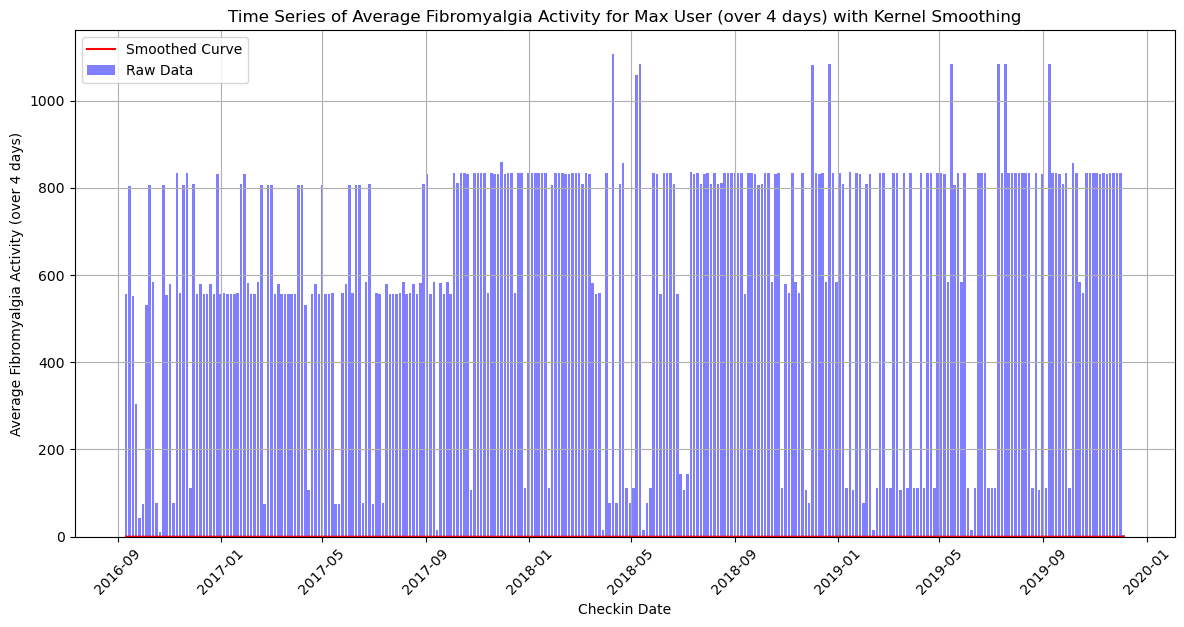

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'fibromyalgia_rows' is your DataFrame containing the data
# Filter the data for rows where 'trackable_name' is 'Fibromyalgia'
fibromyalgia_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']

# Group the data by 'user_id' and calculate the entry count for each user
user_counts = fibromyalgia_data.groupby('user_id').size().reset_index(name='entry_count')

# Find the user_id with the highest entry count
max_user_id = user_counts.loc[user_counts['entry_count'].idxmax(), 'user_id']

# Filter the data for the user with the highest entry count
max_user_data = fibromyalgia_data[fibromyalgia_data['user_id'] == max_user_id]

# Convert 'checkin_date' to datetime format
max_user_data['checkin_date'] = pd.to_datetime(max_user_data['checkin_date'])

# Sort the data by 'checkin_date'
max_user_data = max_user_data.sort_values(by='checkin_date')

# Group the data for the max user by a 4-day rolling window and calculate the average trackable value
average_4_days = max_user_data.groupby(pd.Grouper(key='checkin_date', freq='4D'))['trackable_value'].mean().reset_index()

# Kernel smoothing to obtain the smooth curve
kde = gaussian_kde(average_4_days['trackable_value'])
smoothed_values = kde(average_4_days['trackable_value'])

# Create a bar graph of the average trackable value over 4 days for the max user
plt.figure(figsize=(12, 6))
plt.bar(average_4_days['checkin_date'], average_4_days['trackable_value'], width=3, color='b', alpha=0.5, label='Raw Data')
plt.plot(average_4_days['checkin_date'], smoothed_values, color='r', label='Smoothed Curve')
plt.xlabel('Checkin Date')
plt.ylabel('Average Fibromyalgia Activity (over 4 days)')
plt.title('Time Series of Average Fibromyalgia Activity for Max User (over 4 days) with Kernel Smoothing')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [78]:
fibromyalgia_rows

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries,food_type
290,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,350,Condition,Ehlers-Danlos syndrome,0,16,NaN
291,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,397,Condition,Fibromyalgia,0,16,NaN
292,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,561,Condition,Irritable bowel syndrome,0,16,NaN
293,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,1131,Condition,Chronic Migraines,1,16,NaN
294,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,1,Symptom,abdominal pain,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7970547,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-12-04,225934,Weather,temperature_min,33.0,17,NaN
7970548,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-12-04,225934,Weather,temperature_max,56.0,17,NaN
7970549,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-12-04,225934,Weather,precip_intensity,0.0001,17,NaN
7970550,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-12-04,225934,Weather,pressure,1013.0,17,NaN


In [79]:
fibromyalgia_data

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,num_entries,food_type
291,QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==,NaN,NaN,NaN,2015-05-25,397,Condition,Fibromyalgia,0,16,NaN
308,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,397,Condition,Fibromyalgia,2,11,NaN
347,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,397,Condition,Fibromyalgia,1,16,NaN
363,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-07,397,Condition,Fibromyalgia,1,17,NaN
465,QEVuQwEADFtnDHECcyAylMlv1pPa/Q==,NaN,NaN,NaN,2015-05-29,397,Condition,Fibromyalgia,2,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7970462,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-11-27,397,Condition,Fibromyalgia,2,17,NaN
7970479,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-11-29,397,Condition,Fibromyalgia,2,17,NaN
7970496,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-11-30,397,Condition,Fibromyalgia,2,17,NaN
7970513,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,50.0,female,US,2019-12-01,397,Condition,Fibromyalgia,2,17,NaN


In [80]:
# Assuming you have the 'fibromyalgia_data' and 'pressure_data' DataFrames
# Prepare the data: Extract the two time series you want to analyze
fibromyalgia_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'Fibromyalgia']
pressure_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == 'pressure']

# Convert 'checkin_date' column to datetime format
fibromyalgia_data['checkin_date'] = pd.to_datetime(fibromyalgia_data['checkin_date'])
pressure_data['checkin_date'] = pd.to_datetime(pressure_data['checkin_date'])



import pandas as pd

# Rename columns and keep only necessary columns for pressure_data
pressure_data = pressure_data.rename(columns={'trackable_type': 'pressure_trackable_type',
                                              'trackable_name': 'pressure_trackable_name',
                                              'trackable_value': 'pressure_value'})
pressure_data = pressure_data[['user_id','checkin_date','pressure_value']]

# Rename columns and keep only necessary columns for fibromyalgia_data
fibromyalgia_data = fibromyalgia_data.rename(columns={'trackable_type': 'fibromyalgia_trackable_type',
                                                      'trackable_name': 'fibromyalgia_trackable_name',
                                                      'trackable_value': 'fibromyalgia_value'})
fibromyalgia_data = fibromyalgia_data[['user_id','checkin_date','fibromyalgia_value']]


/tmp/ipykernel_32/464271186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fibromyalgia_data['checkin_date'] = pd.to_datetime(fibromyalgia_data['checkin_date'])
/tmp/ipykernel_32/464271186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure_data['checkin_date'] = pd.to_datetime(pressure_data['checkin_date'])


In [81]:


# Merge the two DataFrames using 'user_id' and 'checkin_date' as the key columns
combined_data = pd.merge(fibromyalgia_data, pressure_data, on=['user_id', 'checkin_date'], how='outer')



# Now you have a DataFrame with the union of user IDs and the union of date times for both pressure and disease activity data
combined_data['both_present'] = (combined_data['fibromyalgia_value'].notnull() & combined_data['pressure_value'].notnull())
percentage_both_present = combined_data.groupby('user_id')['both_present'].mean() * 100

# Print the percentage for each user
print("Percentage of Days Where Both Weather and Disease Activity Data are Present:")
print(percentage_both_present)

Percentage of Days Where Both Weather and Disease Activity Data are Present:
user_id
QEVuQwEA++pbRBEAssUx/BQ4GSxBbQ==     0.000000
QEVuQwEA++z6GMJgxyjYYw0jFdXeDw==     0.000000
QEVuQwEA+/IvXrvEfxv3K+i06e/FkQ==    25.000000
QEVuQwEA+/sIf+0WGsd2x8T5aQYfjg==     0.000000
QEVuQwEA+0N/mAqXWdykypwXAQbNeA==     0.000000
                                      ...    
QEVuQwEAzw8zP81F5pxtY3k5q9ThRA==    40.000000
QEVuQwEAzwNZ5G35Hm1EUMGg0fd0GQ==     0.000000
QEVuQwEAzwnaPxedJgtTjVRQT8VEtA==     0.000000
QEVuQwEAzye6f09ESt+fSX2dSfbQCw==     0.000000
QEVuQwEAzzbGedVTDIuQFBYxXLlPxQ==    83.333333
Name: both_present, Length: 7797, dtype: float64


In [82]:
combined_data[combined_data['both_present']]['user_id'].value_counts().head(20)

QEVuQwEAgu4h6TUSURerctVPXKDehA==    1010
QEVuQwEAo7WDp/KN9mNYeTLAWl9LHA==     712
QEVuQwEA+ANQNP9YQKJ2phj0mCnyjA==     558
QEVuQwEAW5AmGeLd/xLLC0is2ZkRQQ==     484
QEVuQwEAFakKgFnaR8YUCl2tjinVXQ==     361
QEVuQwEAcQnkPhbN8lInSKkg8KKQ3g==     348
QEVuQwEA9FluRm70LH3BP39TQSLZtg==     313
QEVuQwEAgjSid5t5RhpUyf83z5+3vw==     305
QEVuQwEAPqHuMcE2c88ElKezW8zuXw==     301
QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==     265
QEVuQwEAh6mGtOu5N9dIslTrK2+OyQ==     241
QEVuQwEAnq+h41VOGM1sN6LWp9yidg==     235
QEVuQwEAC4tv3RSR5gkj34hPBdzj/Q==     230
QEVuQwEA7VYlmS6r88tnBPNhsJcpBg==     222
QEVuQwEAv+DxrqK0C6EarHFBDiA/iw==     215
QEVuQwEA/OT5Rb8/wbeF2c/Bv8HqmA==     215
QEVuQwEAiG9lnSEDHG0G4GWtyW55LQ==     198
QEVuQwEA4gbYneQJI+Q74uqkLD/h+Q==     191
QEVuQwEAiCzSfGQR0NefHujW9fVI/A==     190
QEVuQwEAxkv6olcMpCRTFR477FqZLQ==     188
Name: user_id, dtype: int64

In [83]:
combined_data[combined_data['user_id']=='QEVuQwEAgu4h6TUSURerctVPXKDehA=='].dropna(subset=['fibromyalgia_value', 'pressure_value'])

,user_id,checkin_date,fibromyalgia_value,pressure_value,both_present
52256,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2017-01-06,2,1018.0,True
52257,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2017-01-07,3,1025.0,True
52258,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2017-01-08,3,1027.0,True
52259,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2017-01-09,2,1037.0,True
52260,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2017-01-10,2,1030.0,True
...,...,...,...,...,...
53261,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2019-12-01,3,1008.0,True
53262,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2019-12-02,3,1002.0,True
53263,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2019-12-03,3,1004.0,True
53264,QEVuQwEAgu4h6TUSURerctVPXKDehA==,2019-12-04,3,1000.0,True


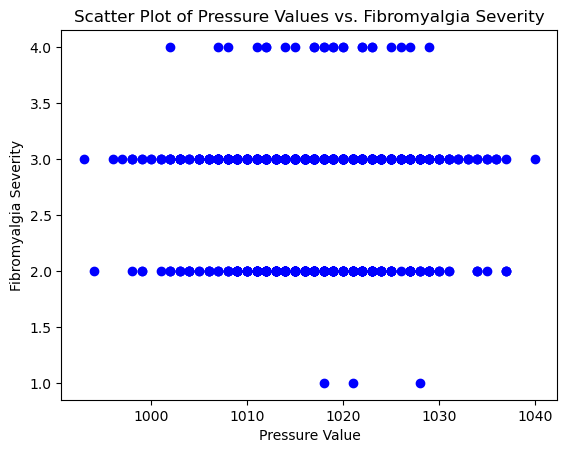

In [84]:
import pandas as pd
import matplotlib.pyplot as plt


user_data = combined_data[combined_data['user_id']=='QEVuQwEAgu4h6TUSURerctVPXKDehA=='].dropna(subset=['fibromyalgia_value', 'pressure_value'])

# Plot scatter plot
plt.scatter(pd.to_numeric(user_data['pressure_value']), pd.to_numeric(user_data['fibromyalgia_value']), color='blue')
plt.xlabel('Pressure Value')
plt.ylabel('Fibromyalgia Severity')
plt.title('Scatter Plot of Pressure Values vs. Fibromyalgia Severity')
plt.show()


To check correlation of several enviroment factors with patient disease activity over time

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


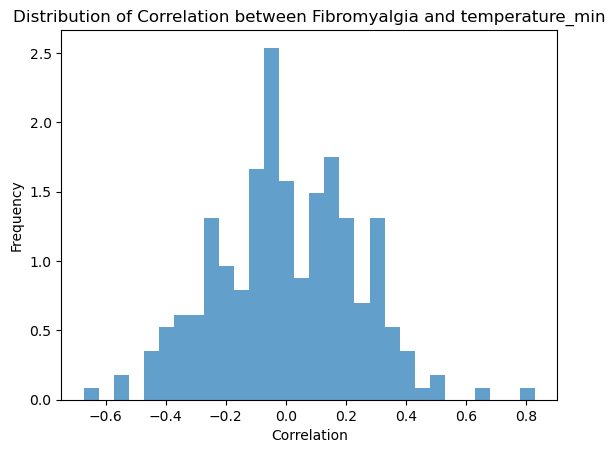

Mean Correlation (temperature_min): 0.0038909510523681507
Median Correlation (temperature_min): -0.016937991602262677


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


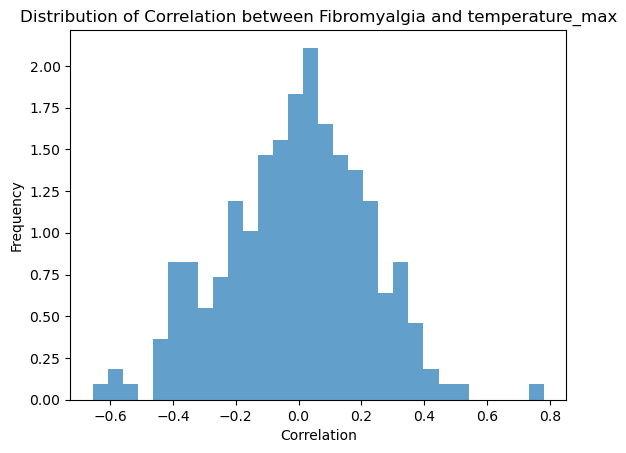

Mean Correlation (temperature_max): -0.008848252312992197
Median Correlation (temperature_max): 0.003919860664780217


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


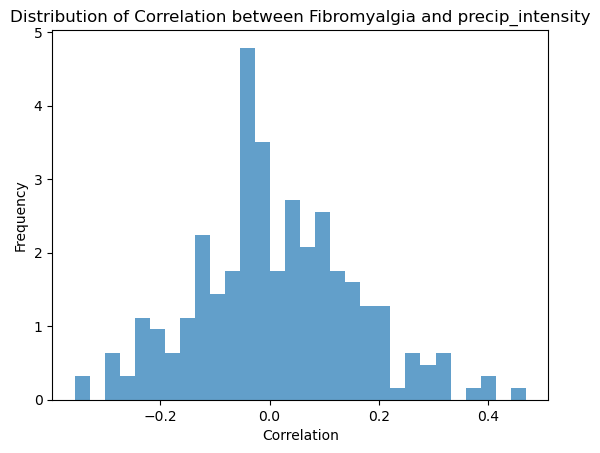

Mean Correlation (precip_intensity): 0.010721747980164599
Median Correlation (precip_intensity): -0.002939826179474205


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


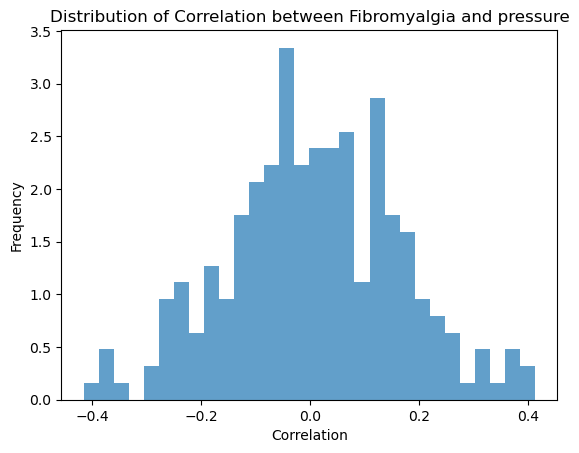

Mean Correlation (pressure): 0.007468463901701782
Median Correlation (pressure): 0.01303865977260302


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


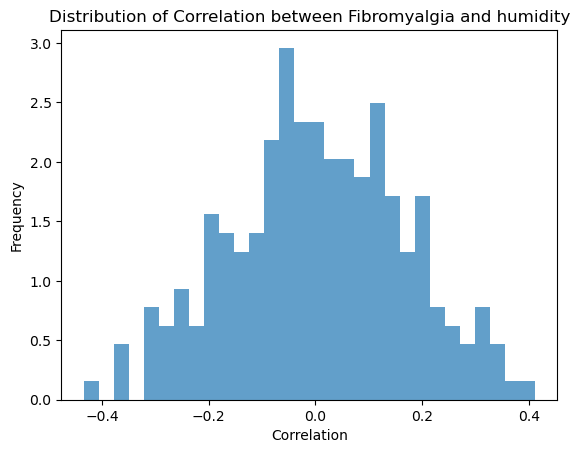

Mean Correlation (humidity): 0.004675260309783472
Median Correlation (humidity): 0.0037499227612109273


In [85]:
# List of weather parameters to analyze
weather_params = ['temperature_min', 'temperature_max', 'precip_intensity', 'pressure', 'humidity']

# Iterate through each weather parameter
for weather_param in weather_params:
    correlation_values = []
    user_ids = []
    weather_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == weather_param]
    # Rename columns and keep only necessary columns for pressure_data
    weather_data = weather_data.rename(columns={'trackable_value': weather_param})
    weather_data = weather_data[['user_id','checkin_date',weather_param]]
    weather_data['checkin_date'] = pd.to_datetime(weather_data['checkin_date'])

    # Merge the two DataFrames using 'user_id' and 'checkin_date' as the key columns
    combined_data = pd.merge(fibromyalgia_data, weather_data, on=['user_id', 'checkin_date'], how='outer')
    # Get unique user_ids
    unique_user_ids = combined_data['user_id'].unique()


    # Now you have a DataFrame with the union of user IDs and the union of date times for both pressure and disease activity data
    combined_data['both_present'] = (combined_data['fibromyalgia_value'].notnull() & combined_data[weather_param].notnull())
    combined_data.sort_values(by=['user_id', 'checkin_date'], inplace=True)

    # Calculate cross-correlation for each user
    for user_id in unique_user_ids:
        user_data = combined_data[combined_data['user_id'] == user_id]

        if any(user_data['both_present']) and len(user_data) > 30:  # Check if at least one True value in 'both_present'
            # Remove rows with null values in 'fibromyalgia_value' or the current weather parameter
            user_data = user_data.dropna(subset=['fibromyalgia_value', weather_param])

            # Convert columns to numeric
            fibromyalgia_values = pd.to_numeric(user_data['fibromyalgia_value'])
            weather_values = pd.to_numeric(user_data[weather_param])

            if len(user_data) > 30 :
                # Calculate correlation coefficient
                correlation = np.corrcoef(fibromyalgia_values, weather_values)[0, 1]
                correlation_values.append(correlation)
                user_ids.append(user_id)

    # Create a DataFrame to store correlation values and user IDs for the current weather parameter
    correlation_df = pd.DataFrame({'user_id': user_ids, 'correlation': correlation_values})

    # Plot distribution of correlation values for the current weather parameter
    plt.hist(correlation_df['correlation'], bins=30, density=True, alpha=0.7)
    plt.xlabel('Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Correlation between Fibromyalgia and {weather_param}')
    plt.show()

    # Calculate mean and median correlation values for the current weather parameter
    mean_correlation = correlation_df['correlation'].mean()
    median_correlation = correlation_df['correlation'].median()

    # Display mean and median correlation values for the current weather parameter
    print(f"Mean Correlation ({weather_param}):", mean_correlation)
    print(f"Median Correlation ({weather_param}):", median_correlation)


/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


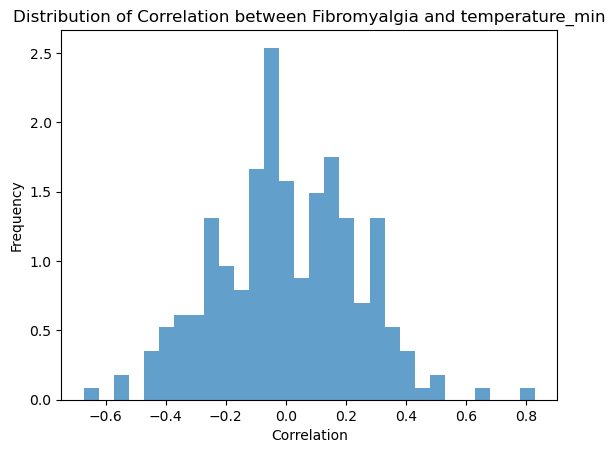

Mean Correlation (temperature_min): 0.0038909510523681507
Median Correlation (temperature_min): -0.01693799160226267


/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


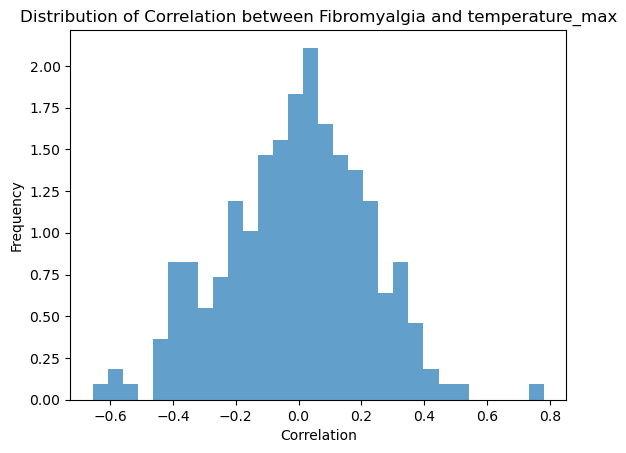

Mean Correlation (temperature_max): -0.008848252312992187
Median Correlation (temperature_max): 0.003919860664780228


/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


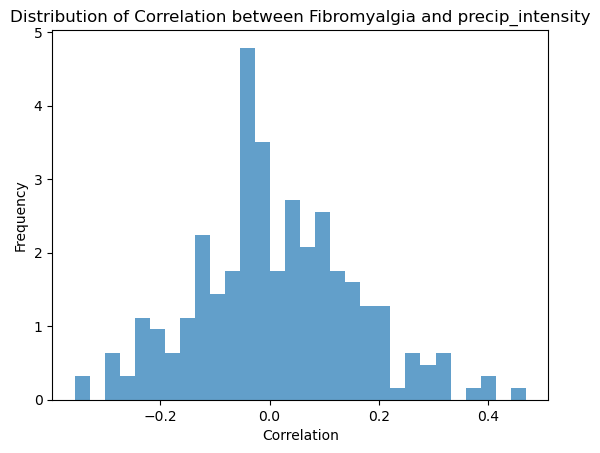

Mean Correlation (precip_intensity): 0.010721747980164608
Median Correlation (precip_intensity): -0.002939826179474213


/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


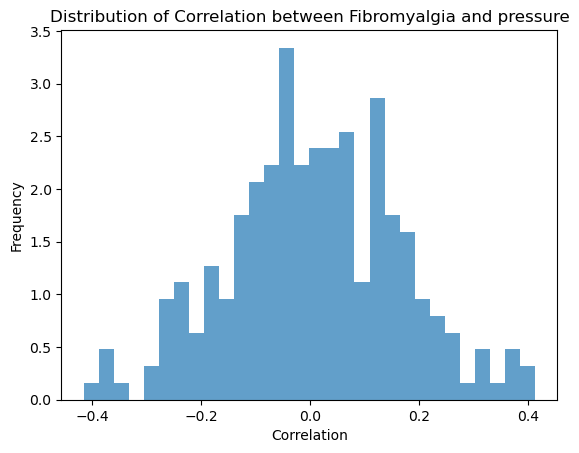

Mean Correlation (pressure): 0.007468463901701782
Median Correlation (pressure): 0.013038659772602969


/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.10/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


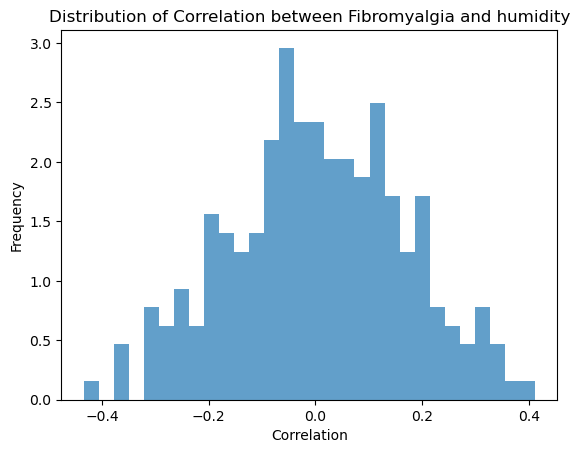

Mean Correlation (humidity): 0.0046752603097834815
Median Correlation (humidity): 0.0037499227612109165


In [86]:
# correlation with pointbiserialr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
# List of weather parameters to analyze
weather_params = ['temperature_min', 'temperature_max', 'precip_intensity', 'pressure', 'humidity']

# Iterate through each weather parameter
for weather_param in weather_params:
    correlation_values = []
    user_ids = []
    weather_data = fibromyalgia_rows[fibromyalgia_rows['trackable_name'] == weather_param]
    # Rename columns and keep only necessary columns for pressure_data
    weather_data = weather_data.rename(columns={'trackable_value': weather_param})
    weather_data = weather_data[['user_id','checkin_date',weather_param]]
    weather_data['checkin_date'] = pd.to_datetime(weather_data['checkin_date'])

    # Merge the two DataFrames using 'user_id' and 'checkin_date' as the key columns
    combined_data = pd.merge(fibromyalgia_data, weather_data, on=['user_id', 'checkin_date'], how='outer')

    # Get unique user_ids
    unique_user_ids = combined_data['user_id'].unique()

    # Now you have a DataFrame with the union of user IDs and the union of date times for both pressure and disease activity data
    combined_data['both_present'] = (combined_data['fibromyalgia_value'].notnull() & combined_data[weather_param].notnull())
    combined_data.sort_values(by=['user_id', 'checkin_date'], inplace=True)

    # Calculate cross-correlation for each user
    for user_id in unique_user_ids:
        user_data = combined_data[combined_data['user_id'] == user_id]

        if any(user_data['both_present']) and len(user_data) > 30:  # Check if at least one True value in 'both_present'
            # Remove rows with null values in 'fibromyalgia_value' or the current weather parameter
            user_data = user_data.dropna(subset=['fibromyalgia_value', weather_param])

            # Convert columns to numeric
            fibromyalgia_values = pd.to_numeric(user_data['fibromyalgia_value'])
            weather_values = pd.to_numeric(user_data[weather_param])

            if len(user_data) > 30 :
                # Calculate correlation coefficient
                correlation, _ = pointbiserialr(fibromyalgia_values, weather_values)
                correlation_values.append(correlation)
                user_ids.append(user_id)

    # Create a DataFrame to store correlation values and user IDs for the current weather parameter
    correlation_df = pd.DataFrame({'user_id': user_ids, 'correlation': correlation_values})

    # Plot distribution of correlation values for the current weather parameter
    plt.hist(correlation_df['correlation'], bins=30, density=True, alpha=0.7)
    plt.xlabel('Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Correlation between Fibromyalgia and {weather_param}')
    plt.show()

    # Calculate mean and median correlation values for the current weather parameter
    mean_correlation = correlation_df['correlation'].mean()
    median_correlation = correlation_df['correlation'].median()

    # Display mean and median correlation values for the current weather parameter
    print(f"Mean Correlation ({weather_param}):", mean_correlation)
    print(f"Median Correlation ({weather_param}):", median_correlation)

In [87]:
user_data

,user_id,checkin_date,fibromyalgia_value,humidity,both_present
55169,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2018-08-05,3,72.0,True
55170,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2018-08-06,2,73.0,True
55171,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2018-08-08,3,79.0,True
55172,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2018-08-09,3,79.0,True
55173,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2018-08-10,3,77.0,True
...,...,...,...,...,...
55259,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2019-11-27,2,60.0,True
55260,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2019-11-29,2,90.0,True
55261,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2019-11-30,2,99.0,True
55262,QEVuQwEAFVXKnAhnXfnsY5rZ6GwGXA==,2019-12-01,2,72.0,True


In [88]:
pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=112325 sha256=7551018eb3872ef2434e06a1832977ebfd9f53f33b389b1000da2c391cb04cc4
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


In [91]:
# from scipy.spatial.distance import euclidean
# from fastdtw import fastdtw

# # Initialize lists to store similarity values and user IDs
# similarity_values = []
# user_ids = []

# # Iterate through unique user IDs
# for user_id in unique_user_ids:
#     user_data = combined_data[combined_data['user_id'] == user_id]
    
#     if any(user_data['both_present']) and len(user_data) > 30:
#         # Remove rows with null values in 'fibromyalgia_value' or 'pressure_value'
#         user_data = user_data.dropna(subset=['fibromyalgia_value', 'pressure'])
        
#         # Convert columns to numeric
#         fibromyalgia_values = pd.to_numeric(user_data['fibromyalgia_value'])
#         pressure_values = pd.to_numeric(user_data['pressure'])
        
#         # Calculate DTW distance as a measure of similarity
#         distance, _ = fastdtw(fibromyalgia_values, pressure_values, dist=euclidean)
#         similarity = 1 / (1 + distance)  # Convert distance to similarity
        
#         similarity_values.append(similarity)
#         user_ids.append(user_id)

# # Create a DataFrame to store similarity values and user IDs
# similarity_df = pd.DataFrame({'user_id': user_ids, 'similarity': similarity_values})

# # Plot distribution of similarity values
# plt.hist(similarity_df['similarity'], bins=30, density=True, alpha=0.7)
# plt.xlabel('Similarity')
# plt.ylabel('Frequency')
# plt.title('Distribution of Similarity between Fibromyalgia and Pressure')
# plt.show()

# # Calculate mean and median similarity values
# mean_similarity = similarity_df['similarity'].mean()
# median_similarity = similarity_df['similarity'].median()

# # Display mean and median similarity values
# print("Mean Similarity:", mean_similarity)
# print("Median Similarity:", median_similarity)
